In [417]:
from blobmodel import (
    Model, 
    show_model, 
    BlobFactory,
    Blob,
    AbstractBlobShape,
    BlobShapeImpl,
)
import numpy as np
import xarray as xr
from scipy import signal
import closedexpressions as ce
import matplotlib.pyplot as plt
import fppanalysis as fpp
from scipy.optimize import curve_fit
import scipy.stats as ss
plt.rcParams['text.usetex'] = True
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }
from plasmapy.analysis.time_series.conditional_averaging import (
    ConditionalEvents,
)
import cosmoplots
plt.style.use(["cosmoplots.default"])

In [403]:
eg_01 = xr.open_dataset("exp_gauss_K1000_T50000_amp1.nc")
gd_01 = xr.open_dataset("gauss_dipole_K1000_T50000_amp1.nc")
v_01 = xr.open_dataset("velocity_K1000_T50000_amp1.nc")

eg_1 = xr.open_dataset("exp_gauss_K10000_T50000_amp1.nc")
gd_1 = xr.open_dataset("gauss_dipole_K10000_T50000_amp1.nc")
v_1 = xr.open_dataset("velocity_K10000_T50000_amp1.nc")

eg_10 = xr.open_dataset("exp_gauss_K100000_T50000_amp1.nc")
gd_10 = xr.open_dataset("gauss_dipole_K100000_T50000_amp1.nc")
v_10 = xr.open_dataset("velocity_K100000_T50000_amp1.nc")


eg_01_exp = xr.open_dataset("exp_gauss_K1000_T50000_amp_exp.nc")
gd_01_exp = xr.open_dataset("gauss_dipole_K1000_T50000_amp_exp.nc")
v_01_exp = xr.open_dataset("velocity_K1000_T50000_amp_exp.nc")

eg_1_exp = xr.open_dataset("exp_gauss_K10000_T50000_amp_exp.nc")
gd_1_exp = xr.open_dataset("gauss_dipole_K10000_T50000_amp_exp.nc")
v_1_exp = xr.open_dataset("velocity_K10000_T50000_amp_exp.nc")

eg_10_exp = xr.open_dataset("exp_gauss_K100000_T50000_amp_exp.nc")
gd_10_exp = xr.open_dataset("gauss_dipole_K100000_T50000_amp_exp.nc")
v_10_exp = xr.open_dataset("velocity_K100000_T50000_amp_exp.nc")


#POSY = uniform
eg_01_posy = xr.open_dataset("exp_gauss_K1000_T50000_amp1_posy.nc")
gd_01_posy = xr.open_dataset("gauss_dipole_K1000_T50000_amp1_posy.nc")
v_01_posy = xr.open_dataset("velocity_K1000_T50000_amp1_posy.nc")

eg_1_posy = xr.open_dataset("exp_gauss_K10000_T50000_amp1_posy.nc")
gd_1_posy = xr.open_dataset("gauss_dipole_K10000_T50000_amp1_posy.nc")
v_1_posy = xr.open_dataset("velocity_K10000_T50000_amp1_posy.nc")

eg_10_posy = xr.open_dataset("exp_gauss_K100000_T50000_amp1_posy.nc")
gd_10_posy = xr.open_dataset("gauss_dipole_K100000_T50000_amp1_posy.nc")
v_10_posy = xr.open_dataset("velocity_K100000_T50000_amp1_posy.nc")


eg_01_exp_posy = xr.open_dataset("exp_gauss_K1000_T50000_amp_exp_posy.nc")
gd_01_exp_posy = xr.open_dataset("gauss_dipole_K1000_T50000_amp_exp_posy.nc")
v_01_exp = xr.open_dataset("velocity_K1000_T50000_amp_exp_posy.nc")

eg_1_exp_posy = xr.open_dataset("exp_gauss_K10000_T50000_amp_exp_posy.nc")
gd_1_exp_posy = xr.open_dataset("gauss_dipole_K10000_T50000_amp_exp_posy.nc")
v_1_exp_posy = xr.open_dataset("velocity_K10000_T50000_amp_exp_posy.nc")

eg_10_exp_posy = xr.open_dataset("exp_gauss_K100000_T50000_amp_exp_posy.nc")
gd_10_exp_posy = xr.open_dataset("gauss_dipole_K100000_T50000_amp_exp_posy.nc")
v_10_exp_posy = xr.open_dataset("velocity_K100000_T50000_amp_exp_posy.nc")

def dataset(x, y, y_down, y_up, eg, gd):
    dy = 0.1*(y_up-y_down)

    Uexb = (gd["n"].isel(x=x, y=y_up) - gd["n"].isel(x=x, y=y_down))/dy

    Jsat = eg["n"].isel(x=x, y=y)

    Vup = gd["n"].isel(x=x, y=y_up)
    
    Vdown = gd["n"].isel(x=x, y=y_down)

    return Uexb, Jsat, Vup, Vdown, dy

In [404]:
#amp = 1
data_01 = dataset(0, 5, 4, 6, eg_01, gd_01)
data_1 = dataset(0, 5, 4, 6, eg_1, gd_1)
data_10 = dataset(0, 5, 4, 6, eg_10, gd_10)

#Jsat
Jsat_01 = data_01[1]
Jsat_1 = data_1[1]
Jsat_10 = data_10[1]
Jsat_01_norm = (Jsat_01 - np.mean(Jsat_01))/np.sqrt(np.var(Jsat_01))
Jsat_1_norm = (Jsat_1 - np.mean(Jsat_1))/np.sqrt(np.var(Jsat_1))
Jsat_10_norm = (Jsat_10 - np.mean(Jsat_10))/np.sqrt(np.var(Jsat_10))

Uexb_01 = data_01[0]
Uexb_1 = data_1[0]
Uexb_10 = data_10[0]
Uexb_01_norm = (Uexb_01 - np.mean(Uexb_01))/np.sqrt(np.var(Uexb_01))
Uexb_1_norm = (Uexb_1 - np.mean(Uexb_1))/np.sqrt(np.var(Uexb_1))
Uexb_10_norm = (Uexb_10 - np.mean(Uexb_10))/np.sqrt(np.var(Uexb_10))

#amp = exp
data_01_exp = dataset(0, 5, 4, 6, eg_01_exp, gd_01_exp)
data_1_exp = dataset(0, 5, 4, 6, eg_1_exp, gd_1_exp)
data_10_exp = dataset(0, 5, 4, 6, eg_10_exp, gd_10_exp)

#Jsat
Jsat_01_exp = data_01_exp[1]
Jsat_1_exp = data_1_exp[1]
Jsat_10_exp = data_10_exp[1]
Jsat_01_exp_norm = (Jsat_01_exp - np.mean(Jsat_01_exp))/np.sqrt(np.var(Jsat_01_exp))
Jsat_1_exp_norm = (Jsat_1_exp - np.mean(Jsat_1_exp))/np.sqrt(np.var(Jsat_1_exp))
Jsat_10_exp_norm = (Jsat_10_exp - np.mean(Jsat_10_exp))/np.sqrt(np.var(Jsat_10_exp))

Uexb_01_exp = data_01_exp[0]
Uexb_1_exp = data_1_exp[0]
Uexb_10_exp = data_10_exp[0]
Uexb_01_exp_norm = (Uexb_01_exp - np.mean(Uexb_01_exp))/np.sqrt(np.var(Uexb_01_exp))
Uexb_1_exp_norm = (Uexb_1_exp - np.mean(Uexb_1_exp))/np.sqrt(np.var(Uexb_1_exp))
Uexb_10_exp_norm = (Uexb_10_exp - np.mean(Uexb_10_exp))/np.sqrt(np.var(Uexb_10_exp))


In [405]:
#POSY = uniform
#amp = 1
data_01_posy = dataset(0, 5, 4, 6, eg_01_posy, gd_01_posy)
data_1_posy = dataset(0, 5, 4, 6, eg_1_posy, gd_1_posy)
data_10_posy = dataset(0, 5, 4, 6, eg_10_posy, gd_10_posy)

#Jsat
Jsat_01_posy = data_01_posy[1]
Jsat_1_posy = data_1_posy[1]
Jsat_10_posy = data_10_posy[1]
Jsat_01_posy_norm = (Jsat_01_posy - np.mean(Jsat_01_posy))/np.sqrt(np.var(Jsat_01_posy))
Jsat_1_posy_norm = (Jsat_1_posy - np.mean(Jsat_1_posy))/np.sqrt(np.var(Jsat_1_posy))
Jsat_10_posy_norm = (Jsat_10_posy - np.mean(Jsat_10_posy))/np.sqrt(np.var(Jsat_10_posy))

Uexb_01_posy = data_01_posy[0]
Uexb_1_posy = data_1_posy[0]
Uexb_10_posy = data_10_posy[0]
Uexb_01_posy_norm = (Uexb_01_posy - np.mean(Uexb_01_posy))/np.sqrt(np.var(Uexb_01_posy))
Uexb_1_posy_norm = (Uexb_1_posy - np.mean(Uexb_1_posy))/np.sqrt(np.var(Uexb_1_posy))
Uexb_10_posy_norm = (Uexb_10_posy - np.mean(Uexb_10_posy))/np.sqrt(np.var(Uexb_10_posy))

#amp = exp
data_01_exp_posy = dataset(0, 5, 4, 6, eg_01_exp_posy, gd_01_exp_posy)
data_1_exp_posy = dataset(0, 5, 4, 6, eg_1_exp_posy, gd_1_exp_posy)
data_10_exp_posy = dataset(0, 5, 4, 6, eg_10_exp_posy, gd_10_exp_posy)

#Jsat
Jsat_01_exp_posy = data_01_exp_posy[1]
Jsat_1_exp_posy = data_1_exp_posy[1]
Jsat_10_exp_posy = data_10_exp_posy[1]
Jsat_01_exp_posy_norm = (Jsat_01_exp_posy - np.mean(Jsat_01_exp_posy))/np.sqrt(np.var(Jsat_01_exp_posy))
Jsat_1_exp_posy_norm = (Jsat_1_exp_posy - np.mean(Jsat_1_exp_posy))/np.sqrt(np.var(Jsat_1_exp_posy))
Jsat_10_exp_posy_norm = (Jsat_10_exp_posy - np.mean(Jsat_10_exp_posy))/np.sqrt(np.var(Jsat_10_exp_posy))

Uexb_01_exp_posy = data_01_exp_posy[0]
Uexb_1_exp_posy = data_1_exp_posy[0]
Uexb_10_exp_posy = data_10_exp_posy[0]
Uexb_01_exp_posy_norm = (Uexb_01_exp_posy - np.mean(Uexb_01_exp_posy))/np.sqrt(np.var(Uexb_01_exp_posy))
Uexb_1_exp_posy_norm = (Uexb_1_exp_posy - np.mean(Uexb_1_exp_posy))/np.sqrt(np.var(Uexb_1_exp_posy))
Uexb_10_exp_posy_norm = (Uexb_10_exp_posy - np.mean(Uexb_10_exp_posy))/np.sqrt(np.var(Uexb_10_exp_posy))

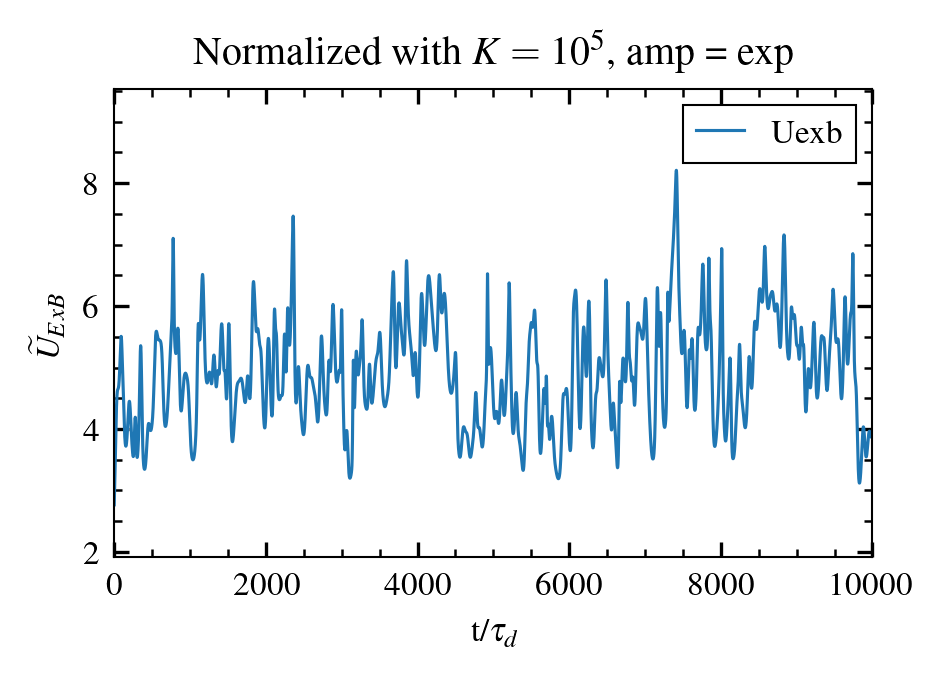

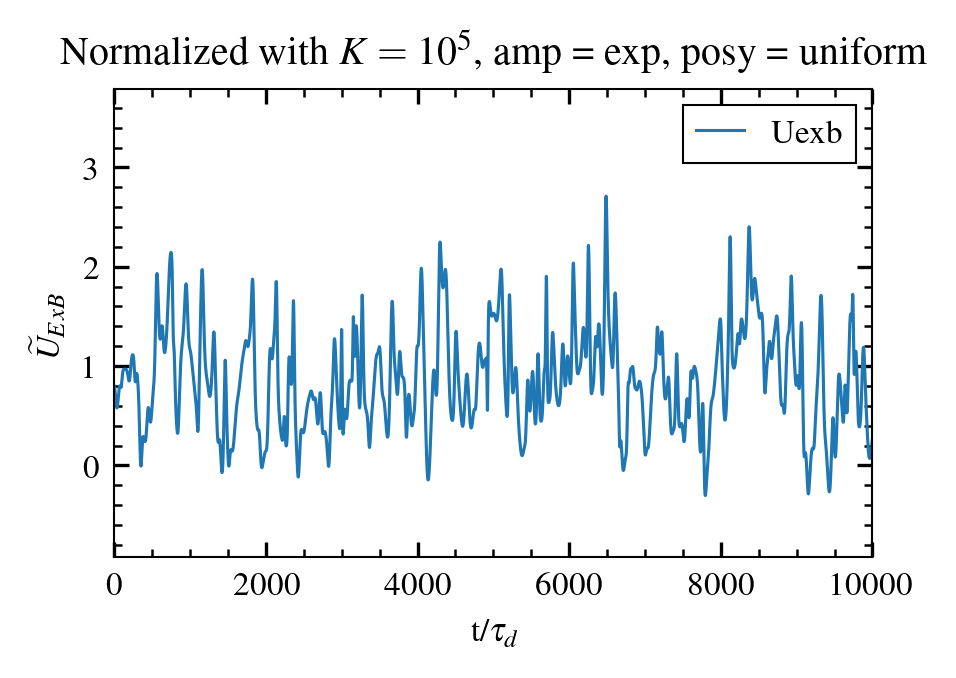

In [425]:
plt.figure()
plt.plot(Uexb_10_exp, label = 'Uexb')
plt.xlabel(r't/$\tau_d$')
plt.ylabel('$\widetilde{U}_{ExB}$')
plt.title(r'Normalized with $K = 10^5$, amp = exp')
plt.legend()
plt.xlim(0, 10000)
#plt.ylim(-3, 5)
plt.show()

plt.figure()
plt.plot(Uexb_10_exp_posy, label = 'Uexb')
plt.xlabel(r't/$\tau_d$')
plt.ylabel('$\widetilde{U}_{ExB}$')
plt.title(r'Normalized with $K = 10^5$, amp = exp, posy = uniform')
plt.legend()
plt.xlim(0, 10000)
#plt.ylim(-3, 5)
plt.show()

In [423]:
def momenter(signal):
    skew = ss.skew(signal)
    kurtosis = ss.kurtosis(signal)
    return skew, kurtosis

mom_Uexb_01 = momenter(Uexb_01_exp_posy_norm)
mom_Uexb_1 = momenter(Uexb_1_exp_posy_norm)
mom_Uexb_10 = momenter(Uexb_10_exp_posy_norm)

print(mom_Uexb_01, mom_Uexb_1, mom_Uexb_10)

(4.312098056274296, 44.34505318977975) (1.409816470862788, 4.912022252730999) (0.43877891086663906, 0.47693923644045677)


## sammenheng

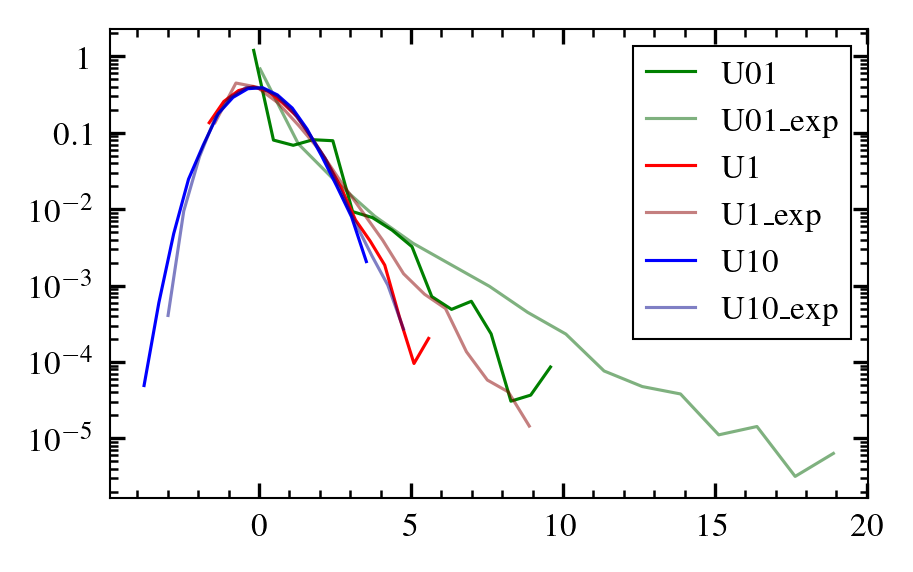

In [285]:
def PDF(signal):
    P_u, bins_u = np.histogram(signal, 16, density=True)
    bin_center_u = (bins_u[1:]+bins_u[:-1])/2
    return P_u, bin_center_u

#amp = 1
PDF_U01 = PDF(Uexb_01_norm)
PDF_U1 = PDF(Uexb_1_norm)
PDF_U10 = PDF(Uexb_10_norm)


#amp = exp
PDF_U01_exp = PDF(Uexb_01_exp_norm)
PDF_U1_exp = PDF(Uexb_1_exp_norm)
PDF_U10_exp = PDF(Uexb_10_exp_norm)

plt.figure()
plt.semilogy(PDF_U01[1], PDF_U01[0], label = 'U01', color = 'g')
plt.semilogy(PDF_U01_exp[1], PDF_U01_exp[0], label = 'U01_exp', color = 'darkgreen', alpha = 0.5)
plt.semilogy(PDF_U1[1], PDF_U1[0], label = 'U1', color = 'r')
plt.semilogy(PDF_U1_exp[1], PDF_U1_exp[0], label = 'U1_exp', color = 'darkred', alpha = 0.5)
plt.semilogy(PDF_U10[1], PDF_U10[0], label = 'U10', color = 'b')
plt.semilogy(PDF_U10_exp[1], PDF_U10_exp[0], label = 'U10_exp', color = 'darkblue', alpha = 0.5)
plt.legend()
plt.show()

# Probability density functions

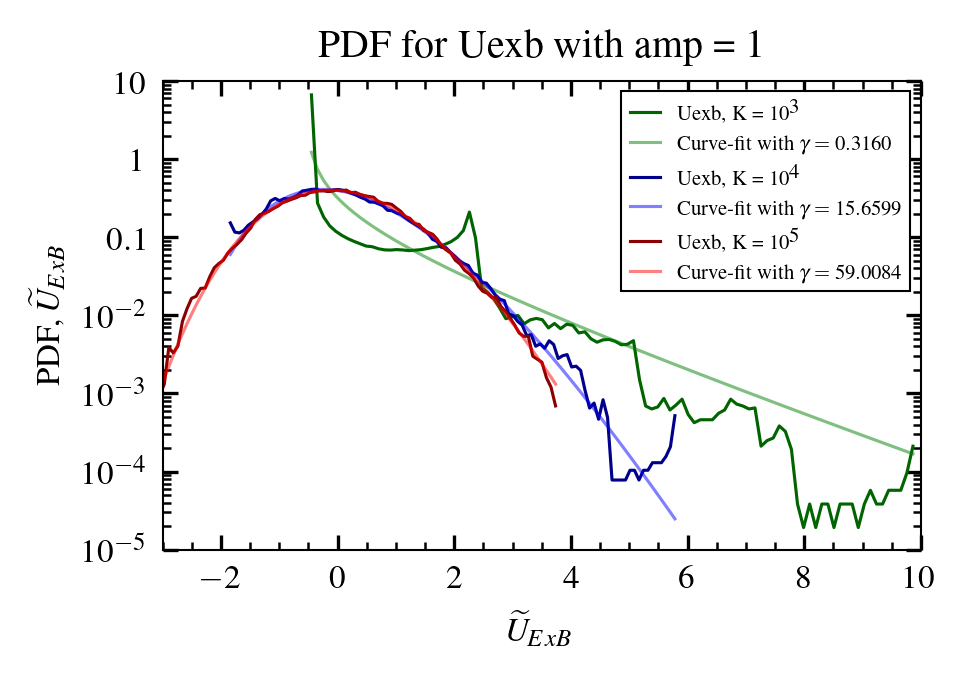

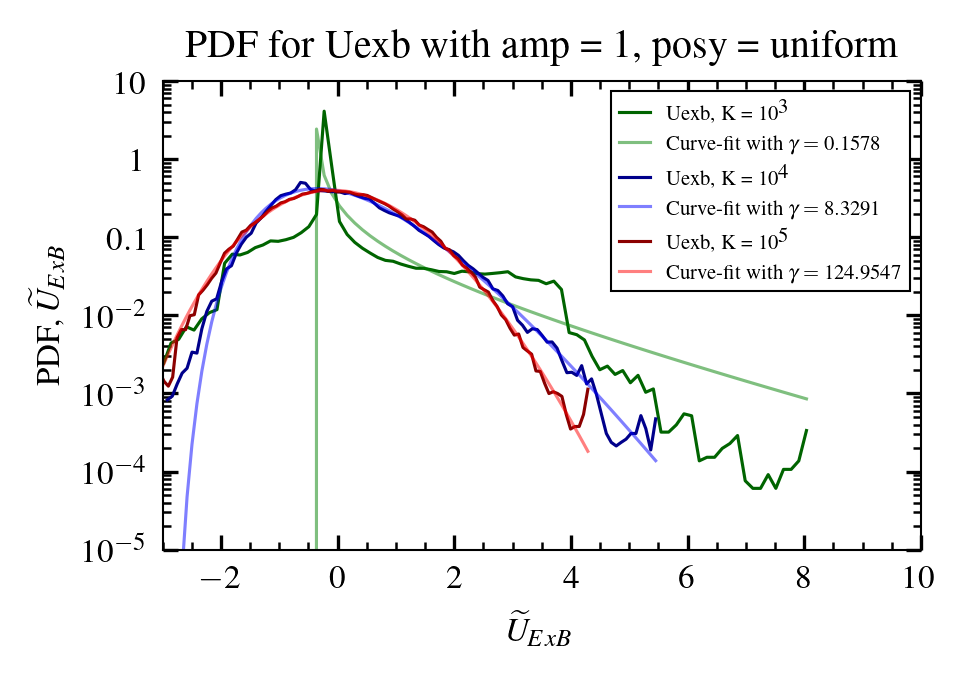

In [426]:
#PDF equal amplitude
def PDF(signal, xmin, xmax):
    x, y = fpp.get_hist(signal, 100)
    good = (x>=xmin)&(x<xmax)&(y>0)
    def fit(x, gamma):
        return np.log(ce.norm_shot_noise_dist(x, gamma))    
    gamma = curve_fit(fit, x[good], np.log(y[good]), p0 = 1, bounds = (0, np.inf))[0][0]
    return x, y, gamma

#amp = 1
PDF_01 = PDF(Uexb_01_norm, 0, 3)
PDF_1 = PDF(Uexb_1_norm, 0, 3)
PDF_10 = PDF(Uexb_10_norm, 0, 3)

plt.show()
plt.semilogy(PDF_01[0], PDF_01[1], label = r'Uexb, K = $10^3$'.format(PDF_01[2]), color = 'darkgreen')
plt.semilogy(PDF_01[0], ce.norm_shot_noise_dist(PDF_01[0], PDF_01[2]), alpha = 0.5, color = 'g', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_01[2]))
plt.semilogy(PDF_1[0], PDF_1[1], label = r'Uexb, K = $10^4$'.format(PDF_1[2]), color = 'darkblue')
plt.semilogy(PDF_1[0], ce.norm_shot_noise_dist(PDF_1[0], PDF_1[2]), alpha = 0.5, color = 'b', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_1[2]))
plt.semilogy(PDF_10[0], PDF_10[1], label = r'Uexb, K = $10^5$'.format(PDF_10[2]), color = 'darkred')
plt.semilogy(PDF_10[0], ce.norm_shot_noise_dist(PDF_10[0], PDF_10[2]), alpha = 0.5, color = 'r', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_10[2]))
plt.title('PDF for Uexb with amp = 1')
plt.xlabel(r'$\widetilde{U}_{ExB}$')
plt.ylabel(r'PDF, $\widetilde{U}_{ExB}$')
plt.xlim(-3, 10)
plt.ylim(10e-6, 10)
plt.legend(fontsize = '5', loc = 'upper right')
plt.show()


#amp = 1, posy
PDF_01_posy = PDF(Uexb_01_posy_norm, 0, 3)
PDF_1_posy = PDF(Uexb_1_posy_norm, 4, 6)
PDF_10_posy = PDF(Uexb_10_posy_norm, 0, 3)

plt.show()
plt.semilogy(PDF_01_posy[0], PDF_01_posy[1], label = r'Uexb, K = $10^3$'.format(PDF_01_posy[2]), color = 'darkgreen')
plt.semilogy(PDF_01_posy[0], ce.norm_shot_noise_dist(PDF_01_posy[0], PDF_01_posy[2]), alpha = 0.5, color = 'g', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_01_posy[2]))
plt.semilogy(PDF_1_posy[0], PDF_1_posy[1], label = r'Uexb, K = $10^4$'.format(PDF_1_posy[2]), color = 'darkblue')
plt.semilogy(PDF_1_posy[0], ce.norm_shot_noise_dist(PDF_1_posy[0], PDF_1_posy[2]), alpha = 0.5, color = 'b', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_1_posy[2]))
plt.semilogy(PDF_10_posy[0], PDF_10_posy[1], label = r'Uexb, K = $10^5$'.format(PDF_10_posy[2]), color = 'darkred')
plt.semilogy(PDF_10_posy[0], ce.norm_shot_noise_dist(PDF_10_posy[0], PDF_10_posy[2]), alpha = 0.5, color = 'r', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_10_posy[2]))
plt.title('PDF for Uexb with amp = 1, posy = uniform')
plt.xlabel(r'$\widetilde{U}_{ExB}$')
plt.ylabel(r'PDF, $\widetilde{U}_{ExB}$')
plt.xlim(-3, 10)
plt.ylim(10e-6, 10)
plt.legend(fontsize = '5', loc = 'upper right')
plt.show()

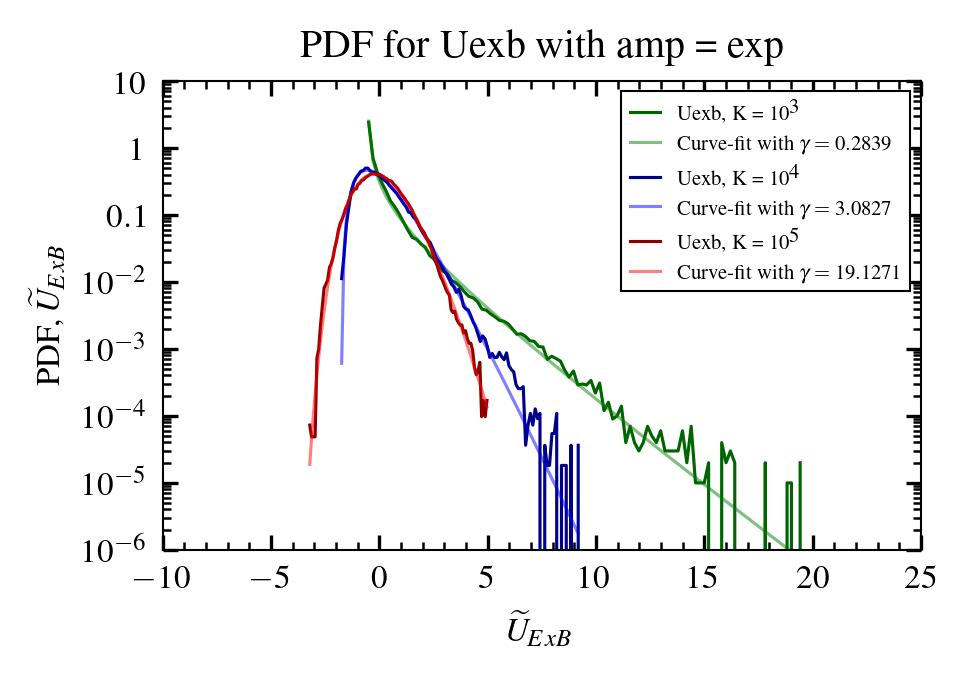

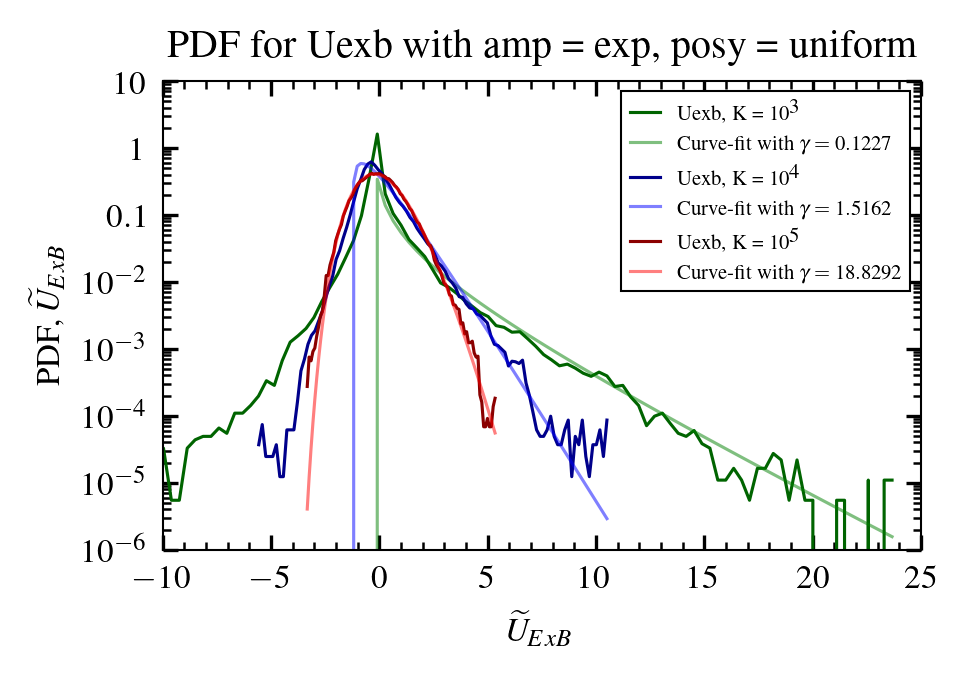

In [203]:
#amp = exp
PDF_01_exp = PDF(Uexb_01_exp_norm, 0, 5)
PDF_1_exp = PDF(Uexb_1_exp_norm, 0, 5)
PDF_10_exp = PDF(Uexb_10_exp_norm, 0, 5)


plt.show()
plt.semilogy(PDF_01_exp[0], PDF_01_exp[1], label = r'Uexb, K = $10^3$'.format(PDF_01[2]), color = 'darkgreen')
plt.semilogy(PDF_01_exp[0], ce.norm_shot_noise_dist(PDF_01_exp[0], PDF_01_exp[2]), alpha = 0.5, color = 'g', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_01_exp[2]))
plt.semilogy(PDF_1_exp[0], PDF_1_exp[1], label = r'Uexb, K = $10^4$'.format(PDF_1_exp[2]), color = 'darkblue')
plt.semilogy(PDF_1_exp[0], ce.norm_shot_noise_dist(PDF_1_exp[0], PDF_1_exp[2]), alpha = 0.5, color = 'b', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_1_exp[2]))
plt.semilogy(PDF_10_exp[0], PDF_10_exp[1], label = r'Uexb, K = $10^5$'.format(PDF_10_exp[2]), color = 'darkred')
plt.semilogy(PDF_10_exp[0], ce.norm_shot_noise_dist(PDF_10_exp[0], PDF_10_exp[2]), alpha = 0.5, color = 'r', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_10_exp[2]))
plt.title('PDF for Uexb with amp = exp')
plt.xlabel(r'$\widetilde{U}_{ExB}$')
plt.ylabel(r'PDF, $\widetilde{U}_{ExB}$')
plt.xlim(-10, 25)
plt.ylim(10e-7, 10)
plt.legend(fontsize = '5', loc = 'upper right')
plt.show()

PDF_01_exp_posy = PDF(Uexb_01_exp_posy_norm, 0, 5)
PDF_1_exp_posy = PDF(Uexb_1_exp_posy_norm, 0, 5)
PDF_10_exp_posy = PDF(Uexb_10_exp_posy_norm, 0, 5)


plt.show()
plt.semilogy(PDF_01_exp_posy[0], PDF_01_exp_posy[1], label = r'Uexb, K = $10^3$'.format(PDF_01_exp_posy[2]), color = 'darkgreen')
plt.semilogy(PDF_01_exp_posy[0], ce.norm_shot_noise_dist(PDF_01_exp_posy[0], PDF_01_exp_posy[2]), alpha = 0.5, color = 'g', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_01_exp_posy[2]))
plt.semilogy(PDF_1_exp_posy[0], PDF_1_exp_posy[1], label = r'Uexb, K = $10^4$'.format(PDF_1_exp_posy[2]), color = 'darkblue')
plt.semilogy(PDF_1_exp_posy[0], ce.norm_shot_noise_dist(PDF_1_exp_posy[0], PDF_1_exp_posy[2]), alpha = 0.5, color = 'b', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_1_exp_posy[2]))
plt.semilogy(PDF_10_exp_posy[0], PDF_10_exp_posy[1], label = r'Uexb, K = $10^5$'.format(PDF_10_exp_posy[2]), color = 'darkred')
plt.semilogy(PDF_10_exp_posy[0], ce.norm_shot_noise_dist(PDF_10_exp_posy[0], PDF_10_exp_posy[2]), alpha = 0.5, color = 'r', 
             label = 'Curve-fit with $\gamma = {:.4f}$'.format(PDF_10_exp_posy[2]))
plt.title('PDF for Uexb with amp = exp, posy = uniform')
plt.xlabel(r'$\widetilde{U}_{ExB}$')
plt.ylabel(r'PDF, $\widetilde{U}_{ExB}$')
plt.xlim(-10, 25)
plt.ylim(10e-7, 10)
plt.legend(fontsize = '5', loc = 'upper right')
plt.show()

# Corelation functions

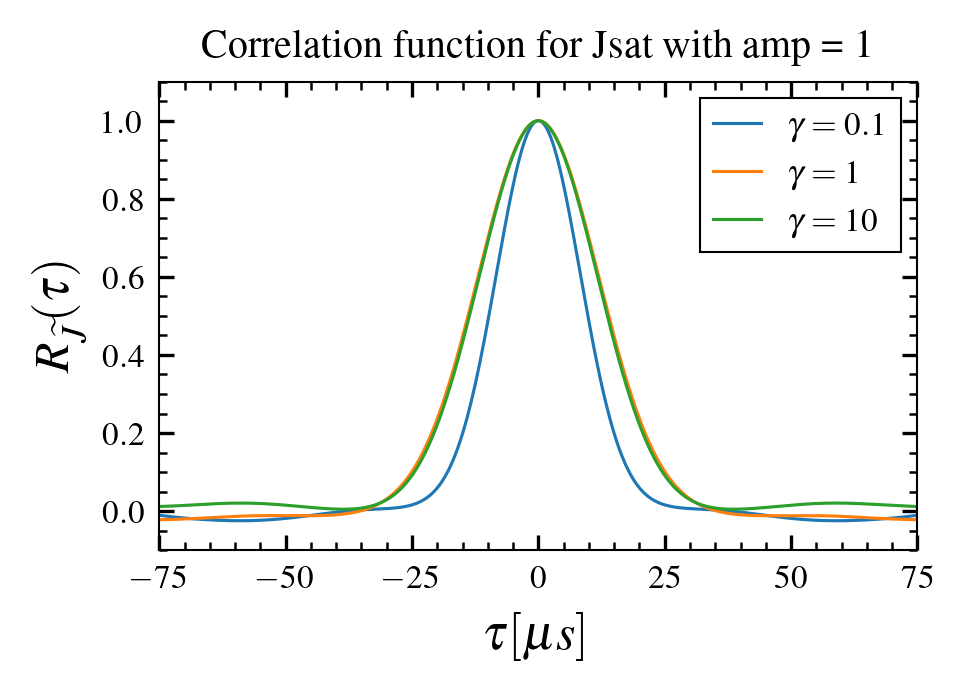

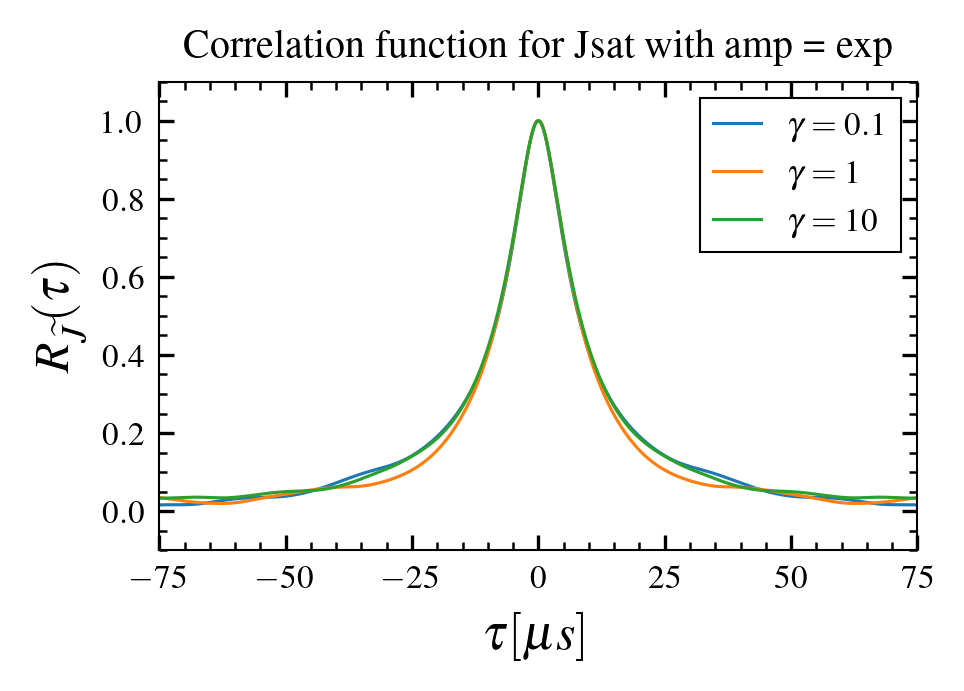

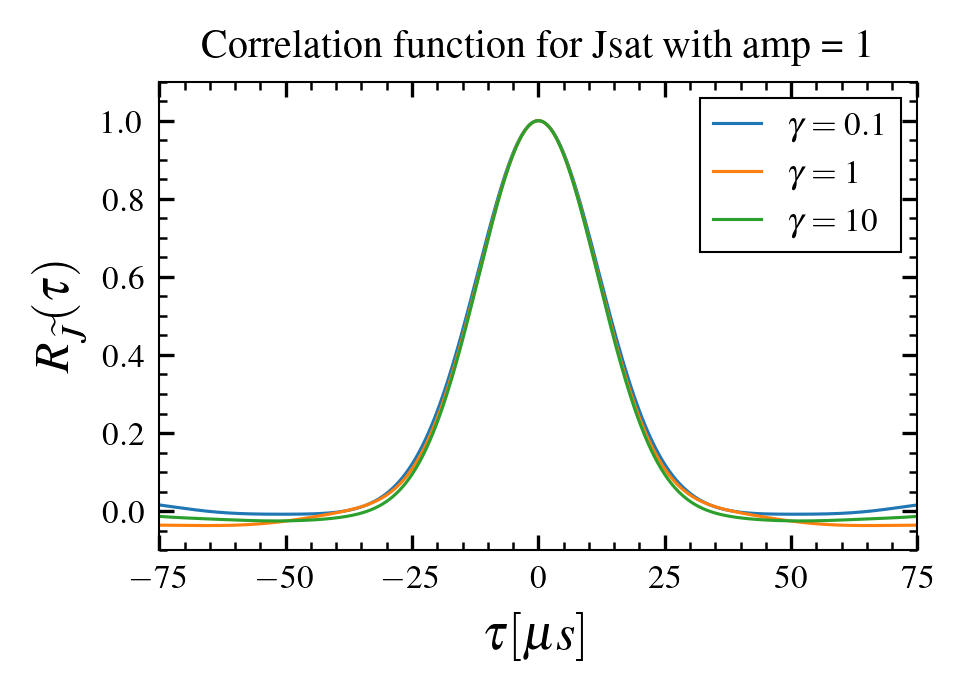

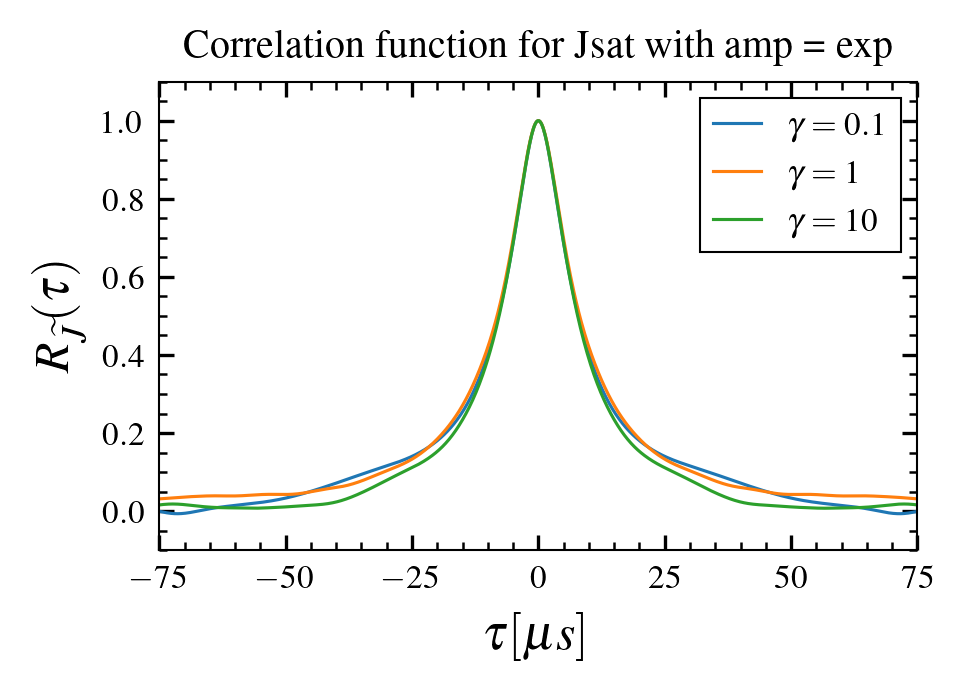

In [436]:
dt = 1/6 #microseconds

def CF(signal, xmin, xmax):
    T, R = fpp.corr_fun(signal, signal, dt, norm = True, biased = False, method = "auto")
    good = (T>=xmin)&(T<xmax)
    td, l = curve_fit(ce.acorr, T[good], R[good], p0 = (1.0, 0.5), bounds = ((0,0), (np.inf, 1)))[0]
    return T, R, td, l

CF_01 = CF(Uexb_01_norm, 0, 25)
td_01 = CF_01[2]
l_01 = CF_01[3]
CF_1 = CF(Uexb_1_norm, 0, 25)
td_1 = CF_1[2]
l_1 = CF_1[3]
CF_10 = CF(Uexb_10_norm, 0, 25)
td_10 = CF_10[2]
l_10 = CF_10[3]


CF_01_exp = CF(Uexb_01_exp_norm, 0, 25)
CF_1_exp = CF(Uexb_1_exp_norm, 0, 25)
CF_10_exp = CF(Uexb_10_exp_norm, 0, 25)

CF_01_posy = CF(Uexb_01_posy_norm, 0, 25)
CF_1_posy = CF(Uexb_1_posy_norm, 0, 25)
CF_10_posy = CF(Uexb_10_posy_norm, 0, 25)

CF_01_exp_posy = CF(Uexb_01_exp_posy_norm, 0, 25)
CF_1_exp_posy = CF(Uexb_1_exp_posy_norm, 0, 25)
CF_10_exp_posy = CF(Uexb_10_exp_posy_norm, 0, 25)


plt.plot(CF_01[0], CF_01[1], label = '$\gamma = 0.1$')
plt.plot(CF_1[0], CF_1[1], label = '$\gamma = 1$')
plt.plot(CF_10[0], CF_10[1], label = '$\gamma = 10$')
plt.title('Correlation function for Jsat with amp = 1')
plt.xlabel(r'$\tau [\mu s]$ ', fontdict = font)
plt.ylabel(r'$R_{\widetilde{J}}(\tau)$', fontdict = font)
plt.legend()
plt.xlim(-75,75)
plt.ylim(-0.1,1.1)
plt.show()

plt.plot(CF_01_exp[0], CF_01_exp[1], label = '$\gamma = 0.1$')
plt.plot(CF_1_exp[0], CF_1_exp[1], label = '$\gamma = 1$')
plt.plot(CF_10_exp[0], CF_10_exp[1], label = '$\gamma = 10$')
plt.title('Correlation function for Jsat with amp = exp')
plt.xlabel(r'$\tau [\mu s]$ ', fontdict = font)
plt.ylabel(r'$R_{\widetilde{J}}(\tau)$', fontdict = font)
plt.legend()
plt.xlim(-75,75)
plt.ylim(-0.1,1.1)
plt.show()

plt.plot(CF_01_posy[0], CF_01_posy[1], label = '$\gamma = 0.1$')
plt.plot(CF_1_posy[0], CF_1_posy[1], label = '$\gamma = 1$')
plt.plot(CF_10_posy[0], CF_10_posy[1], label = '$\gamma = 10$')
plt.title('Correlation function for Jsat with amp = 1')
plt.xlabel(r'$\tau [\mu s]$ ', fontdict = font)
plt.ylabel(r'$R_{\widetilde{J}}(\tau)$', fontdict = font)
plt.legend()
plt.xlim(-75,75)
plt.ylim(-0.1,1.1)
plt.show()

plt.plot(CF_01_exp_posy[0], CF_01_exp_posy[1], label = '$\gamma = 0.1$')
plt.plot(CF_1_exp_posy[0], CF_1_exp_posy[1], label = '$\gamma = 1$')
plt.plot(CF_10_exp_posy[0], CF_10_exp_posy[1], label = '$\gamma = 10$')
plt.title('Correlation function for Jsat with amp = exp')
plt.xlabel(r'$\tau [\mu s]$ ', fontdict = font)
plt.ylabel(r'$R_{\widetilde{J}}(\tau)$', fontdict = font)
plt.legend()
plt.xlim(-75,75)
plt.ylim(-0.1,1.1)
plt.show()


# Power Spectral Density

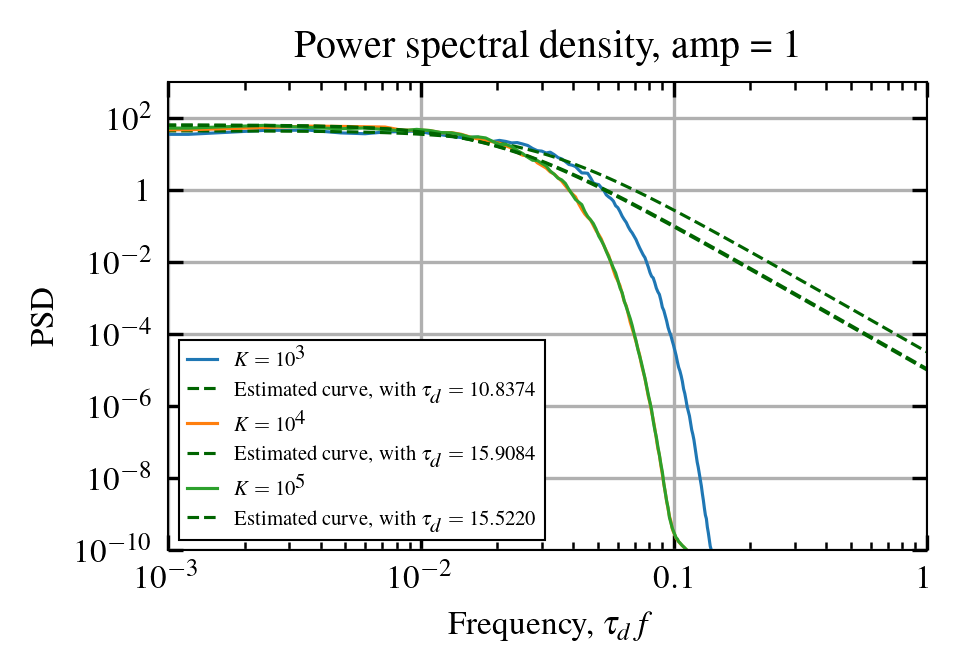

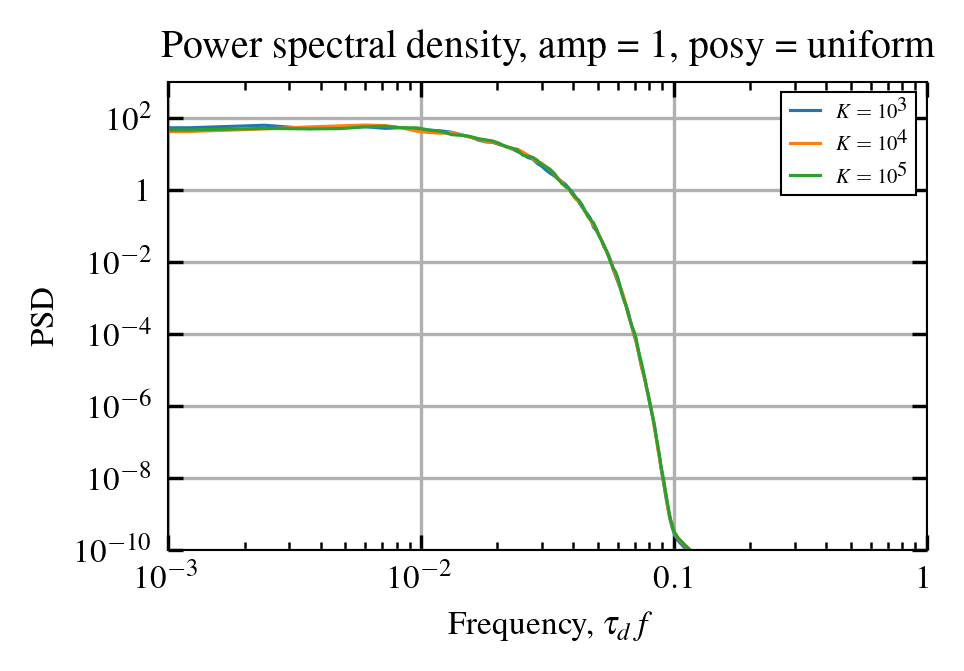

In [437]:

dt = 1/6 #microseconds
def PSD(sig, td, l):
    freq, psd = signal.welch(sig, fs=1/dt, nperseg = sig.size/100)
    omega = 2*np.pi*freq
    good = (freq>1E-6)&(freq<1)
    #use the estimated values for time duration and lambda from the correlation function
    a_psd = ce.psd(omega, td, l)
    return freq, psd, a_psd


PSD_01 = PSD(Uexb_01_norm, td_01, l_01)
PSD_1 = PSD(Uexb_1_norm, td_1, l_1)
PSD_10 = PSD(Uexb_10_norm, td_10, l_10)

PSD_01_posy = PSD(Uexb_01_posy_norm, CF_01_posy[2], CF_01_posy[3])
PSD_1_posy = PSD(Uexb_1_posy_norm, CF_1_posy[2], CF_1_posy[3])
PSD_10_posy = PSD(Uexb_10_posy_norm, CF_10_posy[2], CF_10_posy[3])


plt.figure()
plt.loglog(PSD_01[0], PSD_01[1], label = '$K = 10^3$')
plt.plot(PSD_01[0], PSD_01[2], '--', label = r"Estimated curve, with $\tau_d = {:.4f}$".format(td_01), color = 'darkgreen')
plt.loglog(PSD_1[0], PSD_1[1], label = '$K = 10^4$')
plt.plot(PSD_1[0], PSD_1[2], '--', label = r"Estimated curve, with $\tau_d = {:.4f}$".format(td_1), color = 'darkgreen')
plt.loglog(PSD_10[0], PSD_10[1], label = '$K = 10^5$')
plt.plot(PSD_10[0], PSD_10[2], '--', label = r"Estimated curve, with $\tau_d = {:.4f}$".format(td_10), color = 'darkgreen')
plt.legend(fontsize = '5')
plt.title('Power spectral density, amp = 1')
plt.xlabel(r"Frequency, $\tau_df$")
plt.ylabel("PSD")
plt.xlim(10e-4, 1)
plt.ylim(10e-11, 10e2)
plt.grid()
plt.show()

plt.figure()
plt.loglog(PSD_01_posy[0], PSD_01_posy[1], label = '$K = 10^3$')
plt.loglog(PSD_1_posy[0], PSD_1_posy[1], label = '$K = 10^4$')
plt.loglog(PSD_10_posy[0], PSD_10_posy[1], label = '$K = 10^5$')
plt.legend(fontsize = '5')
plt.title('Power spectral density, amp = 1, posy = uniform')
plt.xlabel(r"Frequency, $\tau_df$")
plt.ylabel("PSD")
plt.xlim(10e-4, 1)
plt.ylim(10e-11, 10e2)
plt.grid()
plt.show()

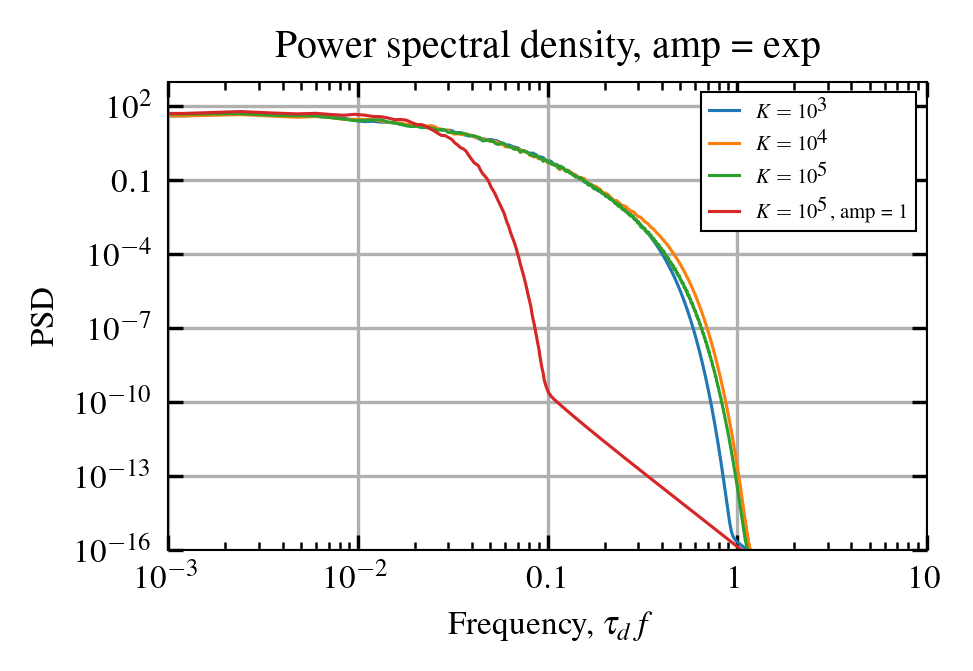

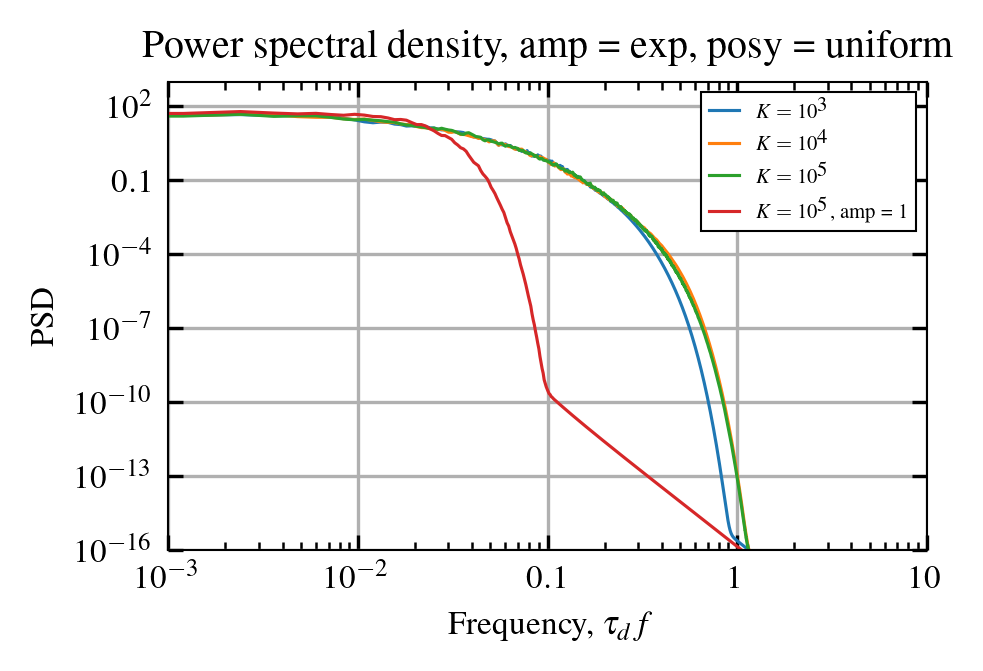

In [441]:
PSD_01_exp = PSD(Uexb_01_exp_norm, CF_01_exp[2], CF_01_exp[3])
PSD_1_exp = PSD(Uexb_1_exp_norm, CF_1_exp[2], CF_1_exp[3])
PSD_10_exp = PSD(Uexb_10_exp_norm, CF_10_exp[2], CF_10_exp[3])

PSD_01_exp_posy = PSD(Uexb_01_exp_posy_norm, CF_01_exp_posy[2], CF_01_exp_posy[3])
PSD_1_exp_posy = PSD(Uexb_1_exp_posy_norm, CF_1_exp_posy[2], CF_1_exp_posy[3])
PSD_10_exp_posy = PSD(Uexb_10_exp_posy_norm, CF_10_exp_posy[2], CF_10_exp_posy[3])

plt.figure()
plt.loglog(PSD_01_exp[0], PSD_01_exp[1], label = '$K = 10^3$')
plt.loglog(PSD_1_exp[0], PSD_1_exp[1], label = '$K = 10^4$')
plt.loglog(PSD_10_exp[0], PSD_10_exp[1], label = '$K = 10^5$')
plt.loglog(PSD_10[0], PSD_10[1], label = '$K = 10^5$, amp = 1')
plt.legend(fontsize = '5')
plt.title('Power spectral density, amp = exp')
plt.xlabel(r"Frequency, $\tau_df$")
plt.ylabel("PSD")
plt.xlim(10e-4, 10)
plt.ylim(10e-17, 10e2)
plt.grid()
plt.show()

plt.figure()
plt.loglog(PSD_01_exp_posy[0], PSD_01_exp_posy[1], label = '$K = 10^3$')
plt.loglog(PSD_1_exp_posy[0], PSD_1_exp_posy[1], label = '$K = 10^4$')
plt.loglog(PSD_10_exp_posy[0], PSD_10_exp_posy[1], label = '$K = 10^5$')
plt.loglog(PSD_10[0], PSD_10[1], label = '$K = 10^5$, amp = 1')
plt.legend(fontsize = '5')
plt.title('Power spectral density, amp = exp, posy = uniform')
plt.xlabel(r"Frequency, $\tau_df$")
plt.ylabel("PSD")
plt.xlim(10e-4, 10)
plt.ylim(10e-17, 10e2)
plt.grid()
plt.show()

# Contitional averaging

1.0 1.0 1.0


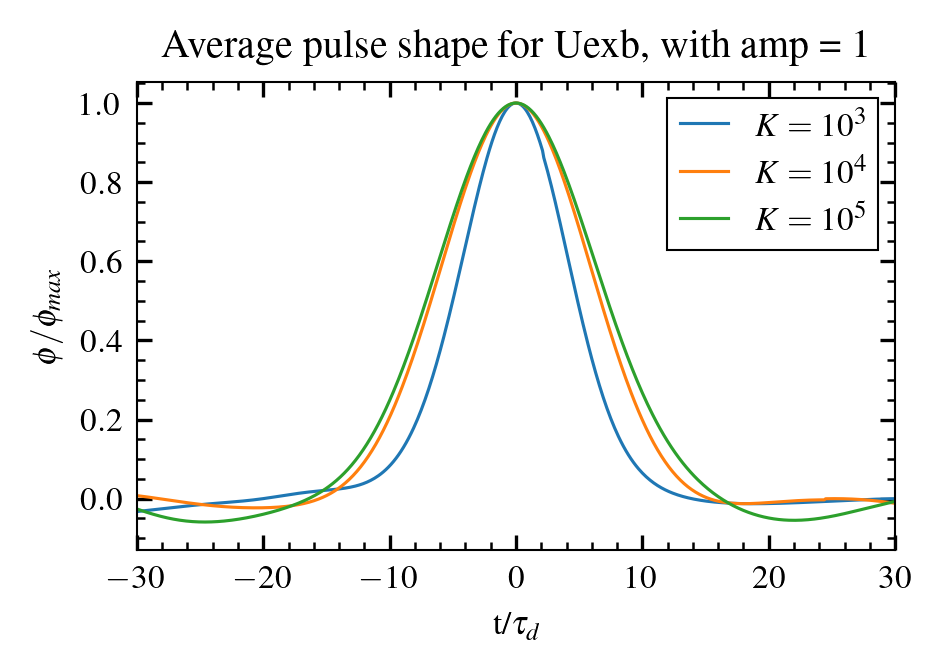

1.0 1.0 1.0


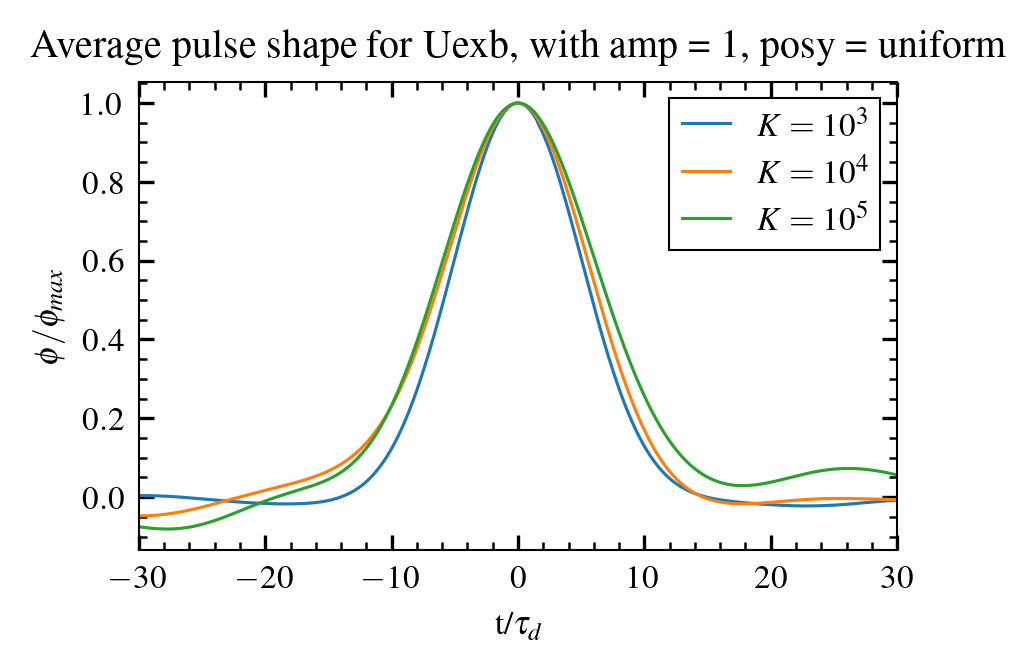

In [445]:
#Conditional averaging for y = Ly/2
#Uexb_norm = fpp.run_norm(Uexb, 10000)
t = np.linspace(0, 50000, 500000)

def CE(signal):
    mean = np.mean(signal)
    rms = np.sqrt(np.var(signal))
    low_t = 2.5*rms + mean
    cond_events = ConditionalEvents(signal, t, float(low_t))
    return cond_events


cond_events_01 = CE(Uexb_01_norm)
cond_events_1 = CE(Uexb_1_norm)
cond_events_10 = CE(Uexb_10_norm)

ce_01 = np.max(cond_events_01.average/np.max(cond_events_01.average))
ce_1 = np.max(cond_events_1.average/np.max(cond_events_1.average))
ce_10 = np.max(cond_events_10.average/np.max(cond_events_10.average))

print(ce_01, ce_1, ce_10)

plt.figure()
plt.plot(cond_events_01.time, cond_events_01.average/np.max(cond_events_01.average), label = r'$K = 10^3$')
plt.plot(cond_events_1.time, cond_events_1.average/np.max(cond_events_1.average), label = r'$K = 10^4$')
plt.plot(cond_events_10.time, cond_events_10.average/np.max(cond_events_10.average), label = r'$K = 10^5$')
plt.xlabel(r't/$\tau_d$')
plt.ylabel('$\phi/\phi_{max}$')
plt.title('Average pulse shape for Uexb, with amp = 1')
plt.xlim(-30,30)
plt.legend()
plt.show()

cond_events_01_posy = CE(Uexb_01_posy_norm)
cond_events_1_posy = CE(Uexb_1_posy_norm)
cond_events_10_posy = CE(Uexb_10_posy_norm)

ce_01_p = np.max(cond_events_01_posy.average/np.max(cond_events_01_posy.average))
ce_1_p = np.max(cond_events_1_posy.average/np.max(cond_events_1_posy.average))
ce_10_p = np.max(cond_events_10_posy.average/np.max(cond_events_10_posy.average))

print(ce_01_p, ce_1_p, ce_10_p)


plt.figure()
plt.plot(cond_events_01_posy.time, cond_events_01_posy.average/np.max(cond_events_01_posy.average), label = r'$K = 10^3$')
plt.plot(cond_events_1_posy.time, cond_events_1_posy.average/np.max(cond_events_1_posy.average), label = r'$K = 10^4$')
plt.plot(cond_events_10_posy.time, cond_events_10_posy.average/np.max(cond_events_10_posy.average), label = r'$K = 10^5$')
plt.xlabel(r't/$\tau_d$')
plt.ylabel('$\phi/\phi_{max}$')
plt.title('Average pulse shape for Uexb, with amp = 1, posy = uniform')
plt.xlim(-30,30)
plt.legend()
plt.show()

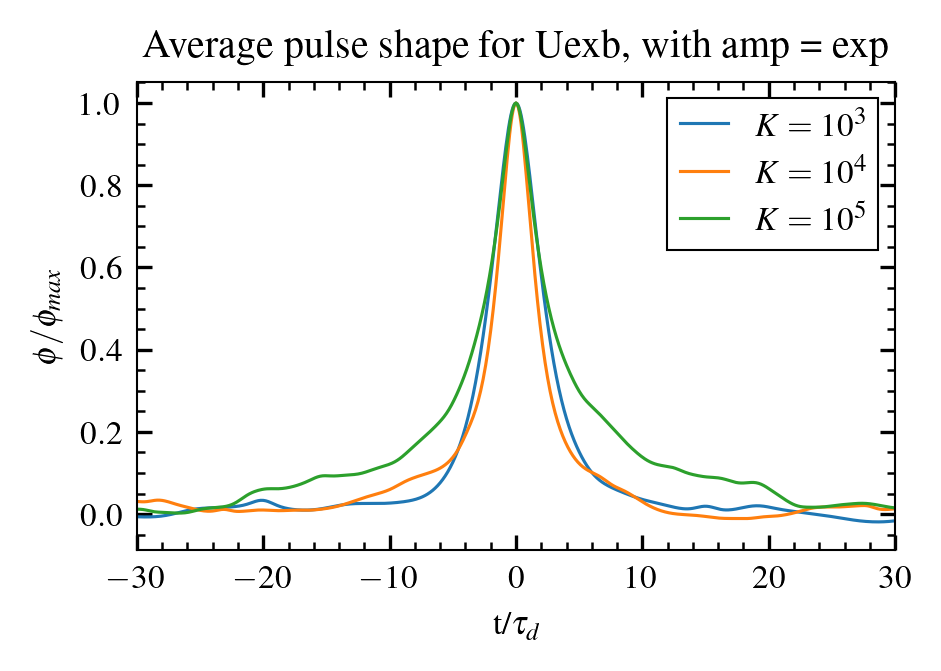

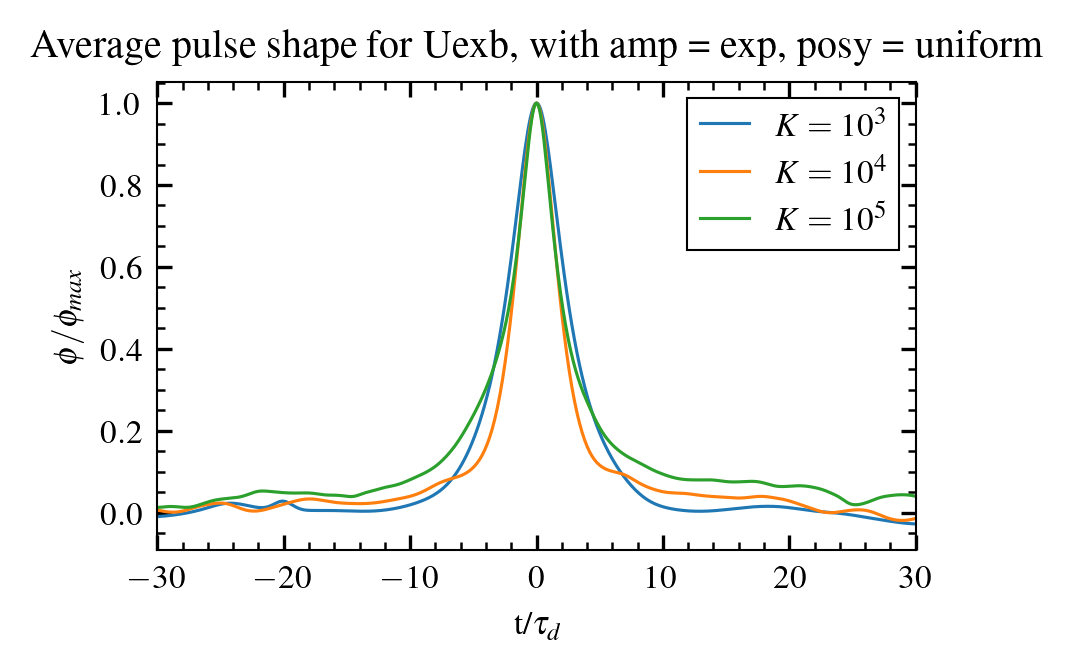

In [210]:
cond_events_01_exp = CE(Uexb_01_exp_norm)
cond_events_1_exp = CE(Uexb_1_exp_norm)
cond_events_10_exp = CE(Uexb_10_exp_norm)

plt.figure()
plt.plot(cond_events_01_exp.time, cond_events_01_exp.average/np.max(cond_events_01_exp.average), label = r'$K = 10^3$')
plt.plot(cond_events_1_exp.time, cond_events_1_exp.average/np.max(cond_events_1_exp.average), label = r'$K = 10^4$')
plt.plot(cond_events_10_exp.time, cond_events_10_exp.average/np.max(cond_events_10_exp.average), label = r'$K = 10^5$')
plt.legend()
plt.xlabel(r't/$\tau_d$')
plt.ylabel('$\phi/\phi_{max}$')
plt.title('Average pulse shape for Uexb, with amp = exp')
plt.xlim(-30,30)
plt.show()


cond_events_01_exp_posy = CE(Uexb_01_exp_posy_norm)
cond_events_1_exp_posy = CE(Uexb_1_exp_posy_norm)
cond_events_10_exp_posy = CE(Uexb_10_exp_posy_norm)

plt.figure()
plt.plot(cond_events_01_exp_posy.time, cond_events_01_exp_posy.average/np.max(cond_events_01_exp_posy.average), label = r'$K = 10^3$')
plt.plot(cond_events_1_exp_posy.time, cond_events_1_exp_posy.average/np.max(cond_events_1_exp_posy.average), label = r'$K = 10^4$')
plt.plot(cond_events_10_exp_posy.time, cond_events_10_exp_posy.average/np.max(cond_events_10_exp_posy.average), label = r'$K = 10^5$')
plt.legend()
plt.xlabel(r't/$\tau_d$')
plt.ylabel('$\phi/\phi_{max}$')
plt.title('Average pulse shape for Uexb, with amp = exp, posy = uniform')
plt.xlim(-30,30)
plt.show()

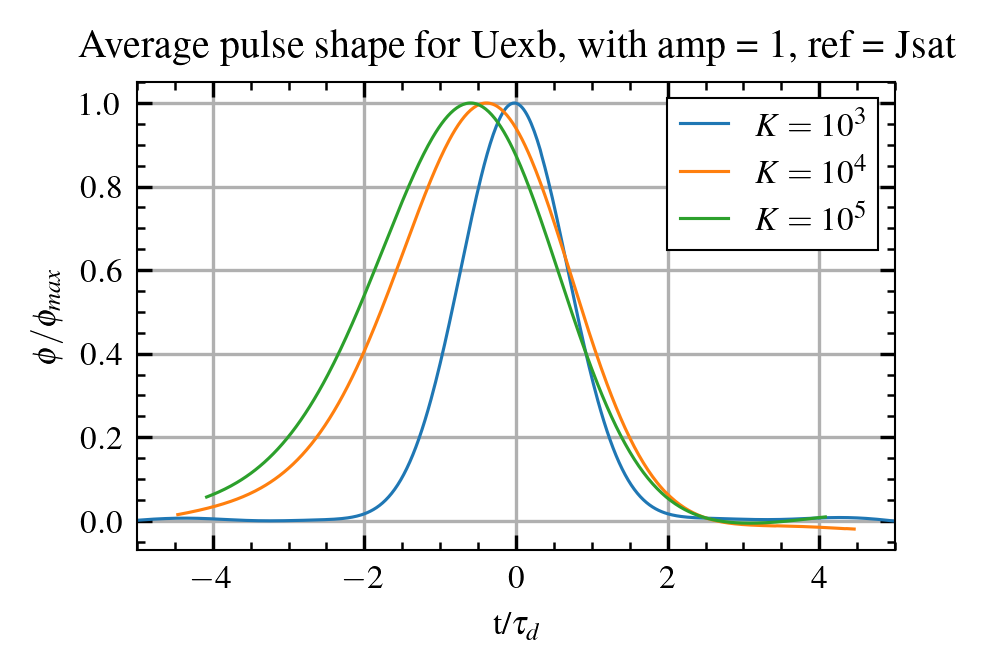

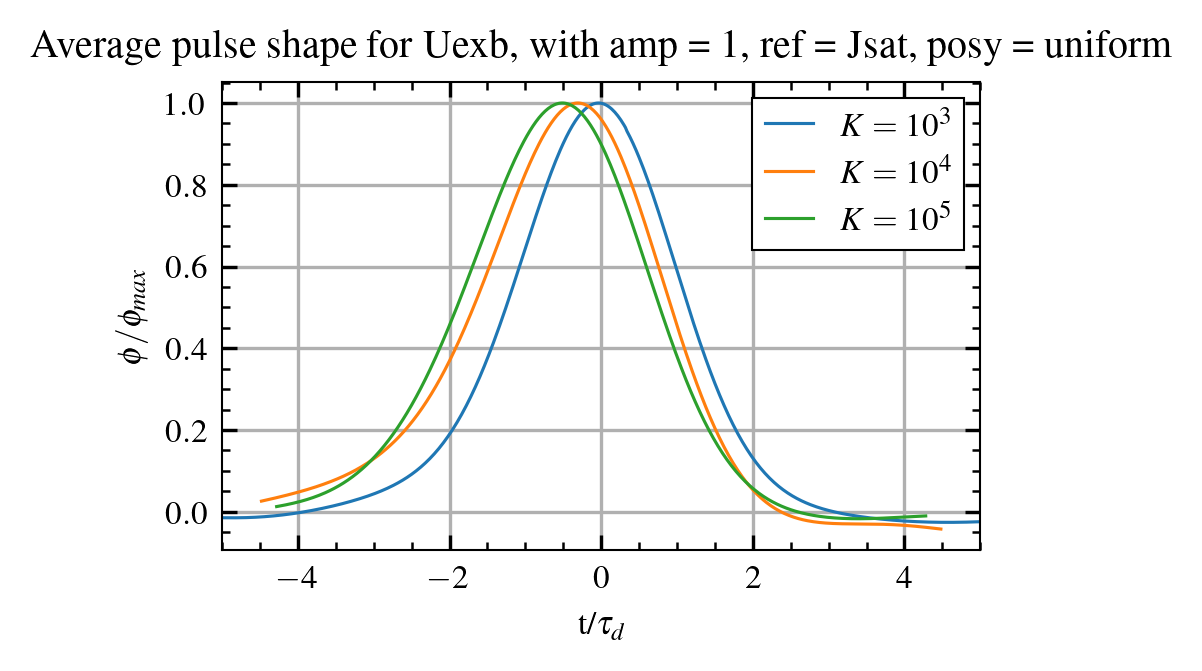

In [211]:
#Conditional averaging for y = Ly/2 referanse Jsat
#Uexb_norm = fpp.run_norm(Uexb, 10000)
t = np.linspace(0, 10000, 500000)

def CE_ref(signal, ref_sign):
    mean = np.mean(signal)
    rms = np.sqrt(np.var(signal))
    low_t = 2.5*rms + mean
    cond_events = ConditionalEvents(signal, t, float(low_t), reference_signal = ref_sign)
    return cond_events

cond_events_01_ref = CE_ref(Uexb_01_norm, Jsat_01_norm)
cond_events_1_ref = CE_ref(Uexb_1_norm, Jsat_1_norm)
cond_events_10_ref = CE_ref(Uexb_10_norm, Jsat_10_norm)

plt.figure()
plt.plot(cond_events_01_ref.time, cond_events_01_ref.average/np.max(cond_events_01_ref.average), label = r'$K = 10^3$')
plt.plot(cond_events_1_ref.time, cond_events_1_ref.average/np.max(cond_events_1_ref.average), label = r'$K = 10^4$')
plt.plot(cond_events_10_ref.time, cond_events_10_ref.average/np.max(cond_events_10_ref.average), label = r'$K = 10^5$')
plt.xlabel(r't/$\tau_d$')
plt.ylabel('$\phi/\phi_{max}$')
plt.title('Average pulse shape for Uexb, with amp = 1, ref = Jsat')
plt.grid()
plt.xlim(-5,5)
plt.legend()
plt.show()

cond_events_01_posy_ref = CE_ref(Uexb_01_posy_norm, Jsat_01_posy_norm)
cond_events_1_posy_ref = CE_ref(Uexb_1_posy_norm, Jsat_1_posy_norm)
cond_events_10_posy_ref = CE_ref(Uexb_10_posy_norm, Jsat_10_posy_norm)

plt.figure()
plt.plot(cond_events_01_posy_ref.time, cond_events_01_posy_ref.average/np.max(cond_events_01_posy_ref.average), label = r'$K = 10^3$')
plt.plot(cond_events_1_posy_ref.time, cond_events_1_posy_ref.average/np.max(cond_events_1_posy_ref.average), label = r'$K = 10^4$')
plt.plot(cond_events_10_posy_ref.time, cond_events_10_posy_ref.average/np.max(cond_events_10_posy_ref.average), label = r'$K = 10^5$')
plt.xlabel(r't/$\tau_d$')
plt.ylabel('$\phi/\phi_{max}$')
plt.title('Average pulse shape for Uexb, with amp = 1, ref = Jsat, posy = uniform')
plt.grid()
plt.xlim(-5,5)
plt.legend()
plt.show()


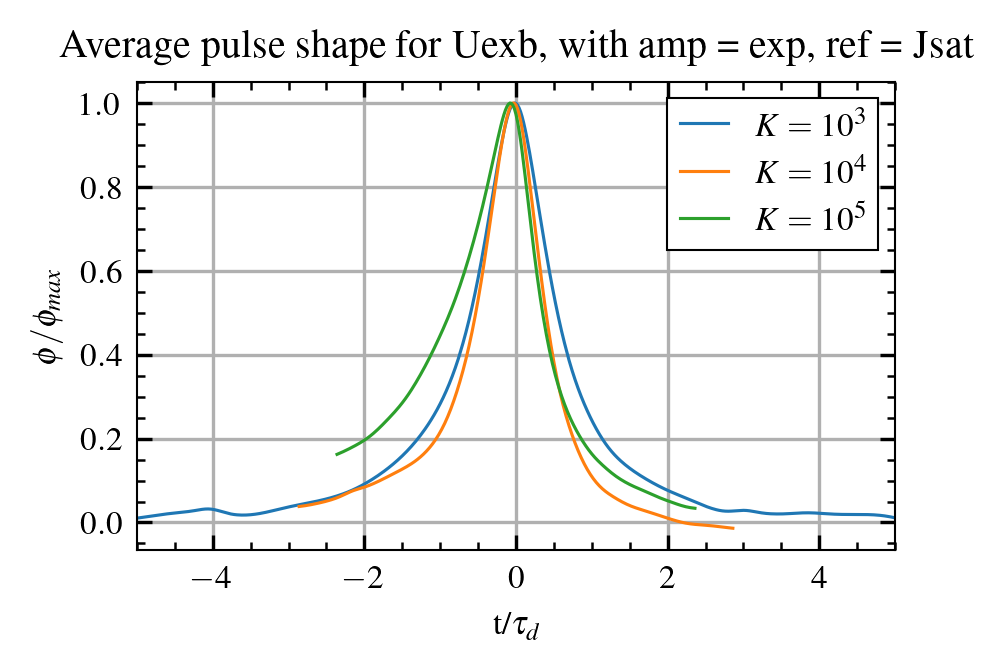

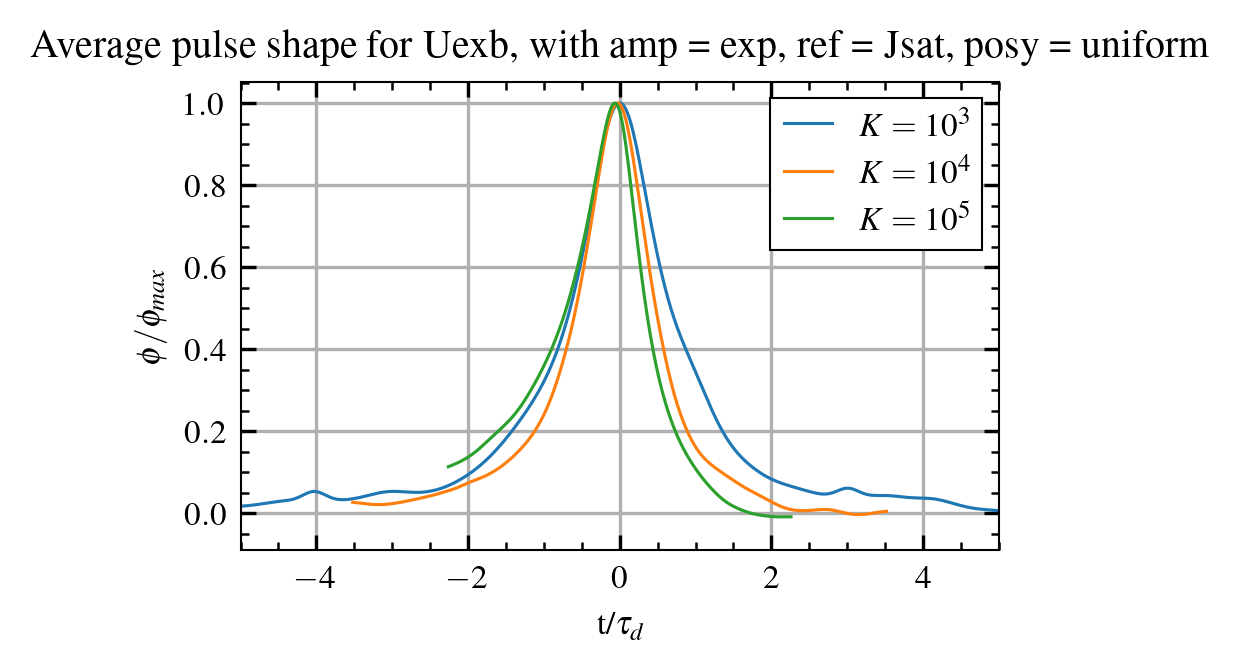

In [212]:
cond_events_01_exp_ref = CE_ref(Uexb_01_exp_norm, Jsat_01_exp_norm)
cond_events_1_exp_ref = CE_ref(Uexb_1_exp_norm, Jsat_1_exp_norm)
cond_events_10_exp_ref = CE_ref(Uexb_10_exp_norm, Jsat_10_exp_norm)

plt.figure()
plt.plot(cond_events_01_exp_ref.time, cond_events_01_exp_ref.average/np.max(cond_events_01_exp_ref.average), label = r'$K = 10^3$')
plt.plot(cond_events_1_exp_ref.time, cond_events_1_exp_ref.average/np.max(cond_events_1_exp_ref.average), label = r'$K = 10^4$')
plt.plot(cond_events_10_exp_ref.time, cond_events_10_exp_ref.average/np.max(cond_events_10_exp_ref.average), label = r'$K = 10^5$')
plt.legend()
plt.grid()
plt.xlabel(r't/$\tau_d$')
plt.ylabel('$\phi/\phi_{max}$')
plt.title('Average pulse shape for Uexb, with amp = exp, ref = Jsat')
plt.xlim(-5,5)
plt.show()

cond_events_01_exp_posy_ref = CE_ref(Uexb_01_exp_posy_norm, Jsat_01_exp_posy_norm)
cond_events_1_exp_posy_ref = CE_ref(Uexb_1_exp_posy_norm, Jsat_1_exp_posy_norm)
cond_events_10_exp_posy_ref = CE_ref(Uexb_10_exp_posy_norm, Jsat_10_exp_posy_norm)

plt.figure()
plt.plot(cond_events_01_exp_posy_ref.time, cond_events_01_exp_posy_ref.average/np.max(cond_events_01_exp_posy_ref.average), label = r'$K = 10^3$')
plt.plot(cond_events_1_exp_posy_ref.time, cond_events_1_exp_posy_ref.average/np.max(cond_events_1_exp_posy_ref.average), label = r'$K = 10^4$')
plt.plot(cond_events_10_exp_posy_ref.time, cond_events_10_exp_posy_ref.average/np.max(cond_events_10_exp_posy_ref.average), label = r'$K = 10^5$')
plt.legend()
plt.grid()
plt.xlabel(r't/$\tau_d$')
plt.ylabel('$\phi/\phi_{max}$')
plt.title('Average pulse shape for Uexb, with amp = exp, ref = Jsat, posy = uniform')
plt.xlim(-5,5)
plt.show()

## Waiting time

In [269]:
def exp_func(x, lamb):
    return lamb*np.exp(-lamb*x)

def PDF_WT(cond_events, xmin, xmax):
    P_u, bins_u = np.histogram(cond_events.waiting_times, 16, density=True)
    bin_center_u = (bins_u[1:]+bins_u[:-1])/2
    good = (bin_center_u>=xmin)&(bin_center_u<xmax)&(P_u>0)
    def fit(bin_center_u, tau_w):
        return np.log(exp_func(bin_center_u, tau_w)) 
    tau_w = curve_fit(fit, bin_center_u[good], np.log(P_u[good]), p0 = 0.01, bounds=(0, np.inf))[0][0]
    return P_u, bin_center_u, tau_w, fit

### WT no ref

In [375]:
def exp_func(x, lamb):
    return lamb*np.exp(-lamb*x)

def PDF_WT(cond_events, xmin, xmax):
    P_u, bins_u = np.histogram(cond_events.waiting_times, 16, density=True)
    bin_center_u = (bins_u[1:]+bins_u[:-1])/2
    good = (bin_center_u>=xmin)&(bin_center_u<xmax)&(P_u>0)
    def fit(bin_center_u, tau_w):
        return np.log(exp_func(bin_center_u, tau_w)) 
    tau_w = curve_fit(fit, bin_center_u[good], np.log(P_u[good]), p0 = 0.1, bounds=(0, np.inf))[0][0]
    return P_u, bin_center_u, tau_w

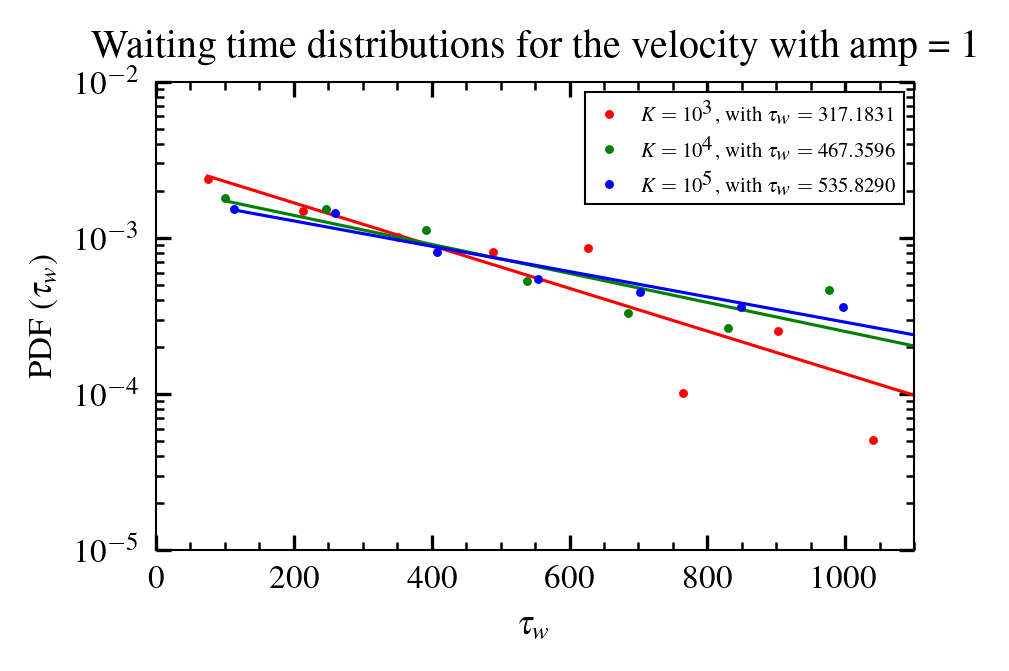

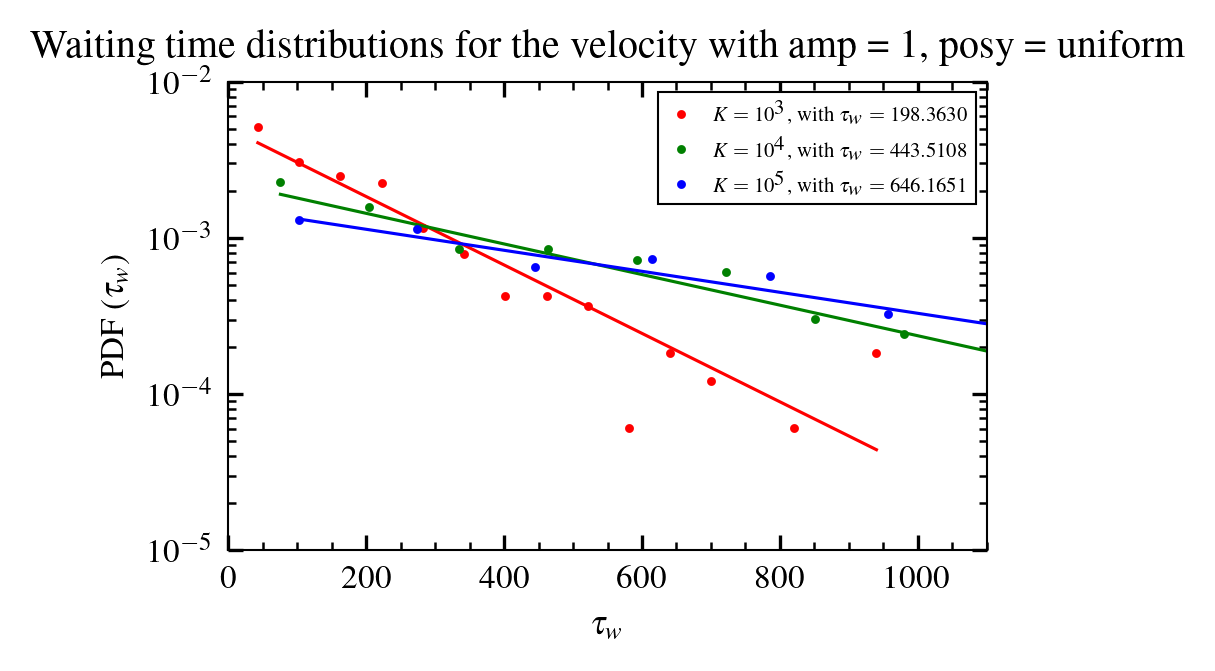

In [376]:
#amp = 1
PDF_WT_01 = PDF_WT(cond_events_01, 0, 1000)
PDF_WT_1 = PDF_WT(cond_events_1, 0, 1000)
PDF_WT_10 = PDF_WT(cond_events_10, 0, 1000)

plt.figure()
plt.semilogy(PDF_WT_01[1], PDF_WT_01[0], '.', label = r'$K = 10^3$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_01[2]), color = 'red')
plt.plot(PDF_WT_01[1], exp_func(PDF_WT_01[1], PDF_WT_01[2]), color = 'red')
plt.semilogy(PDF_WT_1[1], PDF_WT_1[0], '.', label = r'$K = 10^4$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_1[2]), color = 'green')
plt.plot(PDF_WT_1[1], exp_func(PDF_WT_1[1], PDF_WT_1[2]), color = 'green')
plt.semilogy(PDF_WT_10[1], PDF_WT_10[0], '.', label = r'$K = 10^5$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_10[2]), color = 'blue')
plt.plot(PDF_WT_10[1], exp_func(PDF_WT_10[1], PDF_WT_10[2]), color = 'blue')
plt.title('Waiting time distributions for the velocity with amp = 1')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlim(0, 1100)
plt.ylim(10e-6, 10e-3)
plt.xlabel(r'$\tau_w$')
plt.ylabel(r'PDF ($\tau_w$)')
plt.show()

#amp = 1, posy
PDF_WT_01_posy = PDF_WT(cond_events_01_posy, 0, 1000)
PDF_WT_1_posy = PDF_WT(cond_events_1_posy, 0, 1000)
PDF_WT_10_posy = PDF_WT(cond_events_10_posy, 0, 1000)

plt.figure()
plt.semilogy(PDF_WT_01_posy[1], PDF_WT_01_posy[0], '.', label = r'$K = 10^3$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_01_posy[2]), color = 'red')
plt.plot(PDF_WT_01_posy[1], exp_func(PDF_WT_01_posy[1], PDF_WT_01_posy[2]), color = 'red')
plt.semilogy(PDF_WT_1_posy[1], PDF_WT_1_posy[0], '.', label = r'$K = 10^4$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_1_posy[2]), color = 'green')
plt.plot(PDF_WT_1_posy[1], exp_func(PDF_WT_1_posy[1], PDF_WT_1_posy[2]), color = 'green')
plt.semilogy(PDF_WT_10_posy[1], PDF_WT_10_posy[0], '.', label = r'$K = 10^5$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_10_posy[2]), color = 'blue')
plt.plot(PDF_WT_10_posy[1], exp_func(PDF_WT_10_posy[1], PDF_WT_10_posy[2]), color = 'blue')
plt.title('Waiting time distributions for the velocity with amp = 1, posy = uniform')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlim(0, 1100)
plt.ylim(10e-6, 10e-3)
plt.xlabel(r'$\tau_w$')
plt.ylabel(r'PDF ($\tau_w$)')
plt.show()

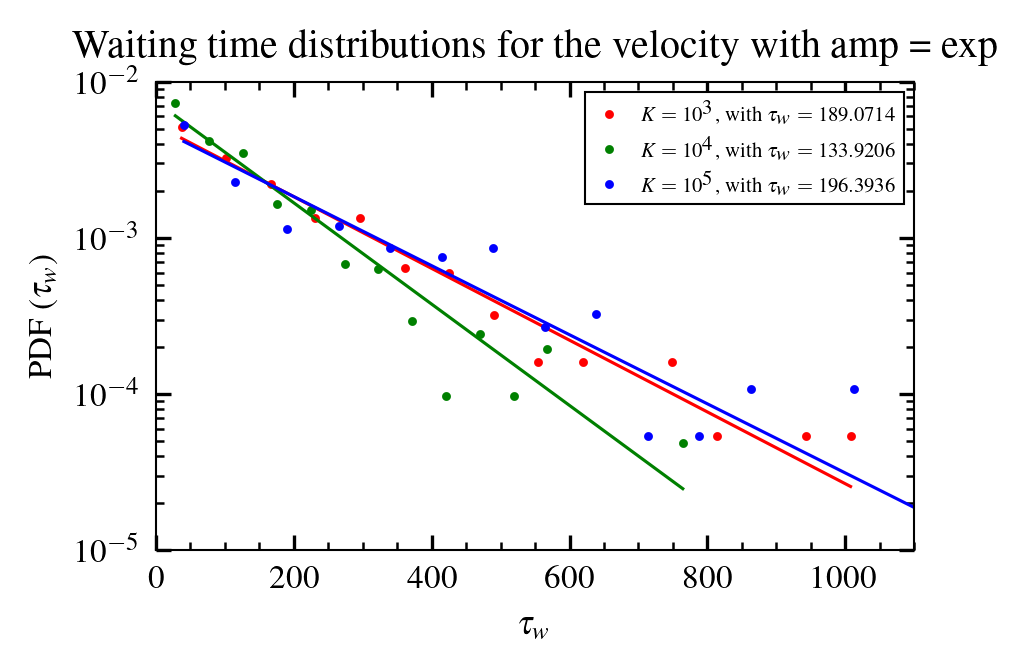

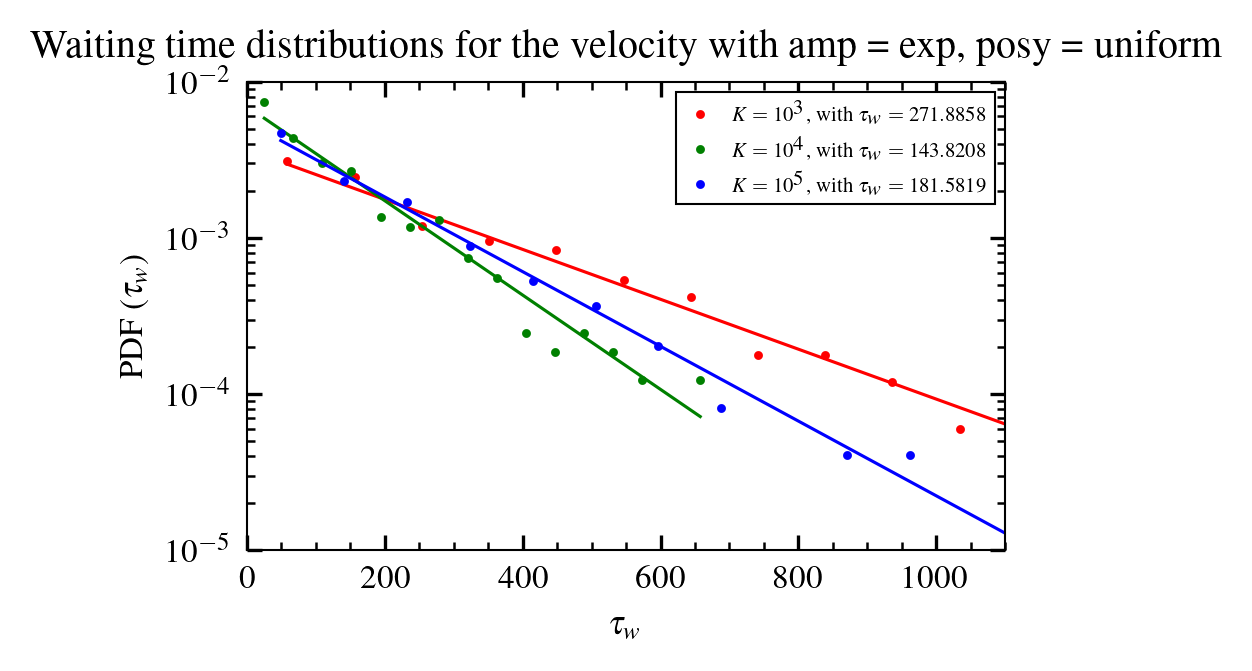

In [377]:
#amp = exp
PDF_WT_01_exp = PDF_WT(cond_events_01_exp, 0, 1000)
PDF_WT_1_exp = PDF_WT(cond_events_1_exp, 0, 1000)
PDF_WT_10_exp = PDF_WT(cond_events_10_exp, 0, 1000)

plt.figure()
plt.semilogy(PDF_WT_01_exp[1], PDF_WT_01_exp[0], '.', label = r'$K = 10^3$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_01_exp[2]), color = 'red')
plt.plot(PDF_WT_01_exp[1], exp_func(PDF_WT_01_exp[1], PDF_WT_01_exp[2]), color = 'red')
plt.semilogy(PDF_WT_1_exp[1], PDF_WT_1_exp[0], '.', label = r'$K = 10^4$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_1_exp[2]), color = 'green')
plt.plot(PDF_WT_1_exp[1], exp_func(PDF_WT_1_exp[1], PDF_WT_1_exp[2]), color = 'green')
plt.semilogy(PDF_WT_10_exp[1], PDF_WT_10_exp[0], '.', label = r'$K = 10^5$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_10_exp[2]), color = 'blue')
plt.plot(PDF_WT_10_exp[1], exp_func(PDF_WT_10_exp[1], PDF_WT_10_exp[2]), color = 'blue')
plt.title('Waiting time distributions for the velocity with amp = exp')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlim(0, 1100)
plt.ylim(10e-6, 10e-3)
plt.xlabel(r'$\tau_w$')
plt.ylabel(r'PDF ($\tau_w$)')
plt.show()

#amp = exp, posy
PDF_WT_01_exp_posy = PDF_WT(cond_events_01_exp_posy, 0, 1000)
PDF_WT_1_exp_posy = PDF_WT(cond_events_1_exp_posy, 0, 1000)
PDF_WT_10_exp_posy = PDF_WT(cond_events_10_exp_posy, 0, 1000)

plt.figure()
plt.semilogy(PDF_WT_01_exp_posy[1], PDF_WT_01_exp_posy[0], '.', label = r'$K = 10^3$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_01_exp_posy[2]), color = 'red')
plt.plot(PDF_WT_01_exp_posy[1], exp_func(PDF_WT_01_exp_posy[1], PDF_WT_01_exp_posy[2]), color = 'red')
plt.semilogy(PDF_WT_1_exp_posy[1], PDF_WT_1_exp_posy[0], '.', label = r'$K = 10^4$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_1_exp_posy[2]), color = 'green')
plt.plot(PDF_WT_1_exp_posy[1], exp_func(PDF_WT_1_exp_posy[1], PDF_WT_1_exp_posy[2]), color = 'green')
plt.semilogy(PDF_WT_10_exp_posy[1], PDF_WT_10_exp_posy[0], '.', label = r'$K = 10^5$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_10_exp_posy[2]), color = 'blue')
plt.plot(PDF_WT_10_exp_posy[1], exp_func(PDF_WT_10_exp_posy[1], PDF_WT_10_exp_posy[2]), color = 'blue')
plt.title('Waiting time distributions for the velocity with amp = exp, posy = uniform')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlim(0, 1100)
plt.ylim(10e-6, 10e-3)
plt.xlabel(r'$\tau_w$')
plt.ylabel(r'PDF ($\tau_w$)')
plt.show()

### WT ref Jsat

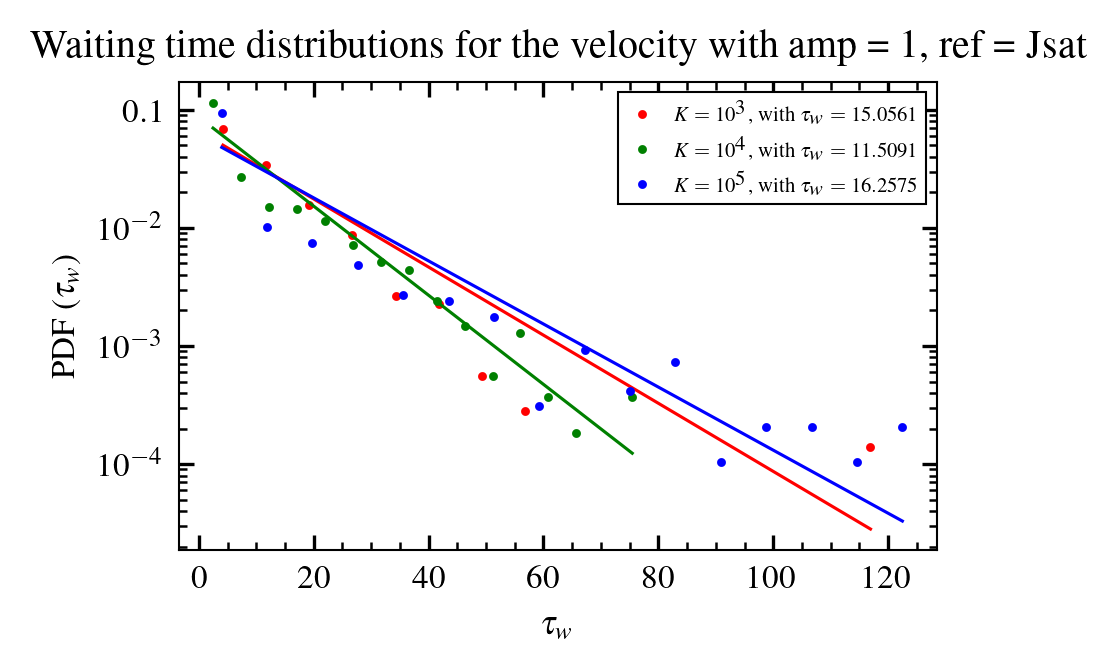

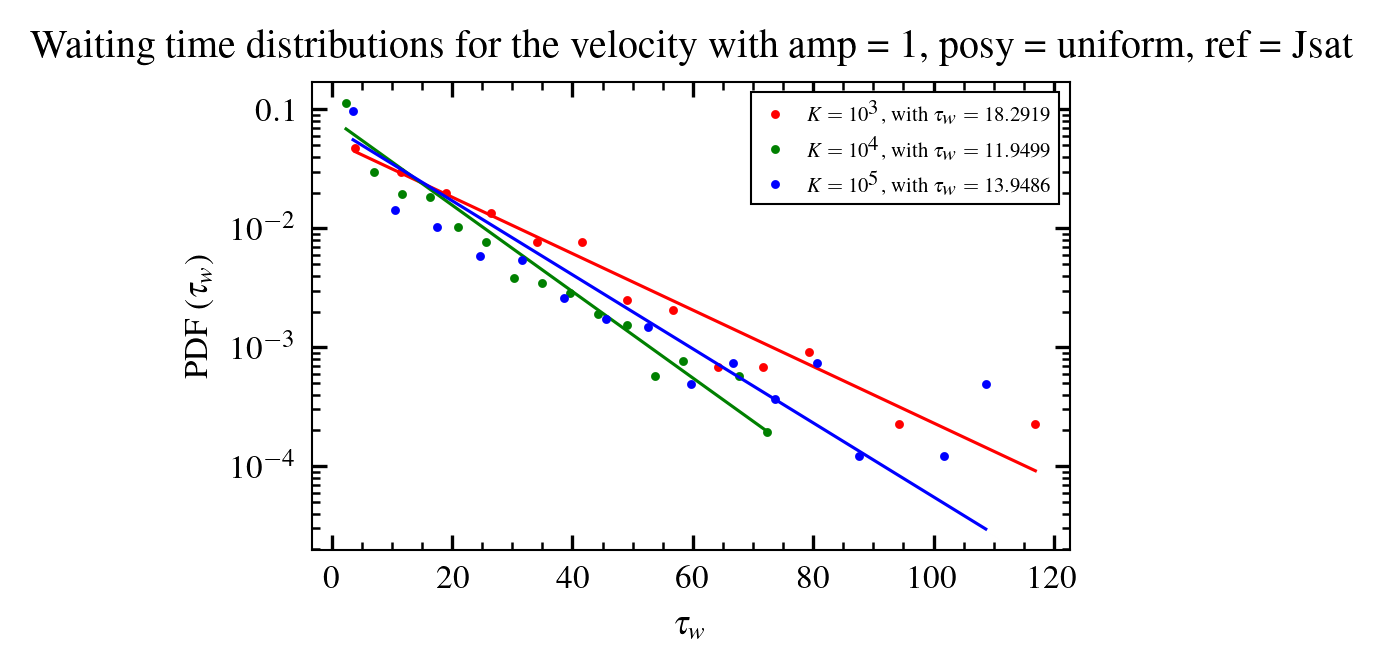

In [378]:
#With Jsat as referance signal
#amp = 1
PDF_WT_01_ref = PDF_WT(cond_events_01_ref, 0, 150)
PDF_WT_1_ref = PDF_WT(cond_events_1_ref, 10, 60)
PDF_WT_10_ref = PDF_WT(cond_events_10_ref, 0, 120)

plt.figure()
plt.semilogy(PDF_WT_01_ref[1], PDF_WT_01_ref[0], '.', label = r'$K = 10^3$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_01_ref[2]), color = 'red')
plt.plot(PDF_WT_01_ref[1], exp_func(PDF_WT_01_ref[1], PDF_WT_01_ref[2]), color = 'red')
plt.semilogy(PDF_WT_1_ref[1], PDF_WT_1_ref[0], '.', label = r'$K = 10^4$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_1_ref[2]), color = 'green')
plt.plot(PDF_WT_1_ref[1], exp_func(PDF_WT_1_ref[1], PDF_WT_1_ref[2]), color = 'green')
plt.semilogy(PDF_WT_10_ref[1], PDF_WT_10_ref[0], '.', label = r'$K = 10^5$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_10_ref[2]), color = 'blue')
plt.plot(PDF_WT_10_ref[1], exp_func(PDF_WT_10_ref[1], PDF_WT_10_ref[2]), color = 'blue')
plt.title('Waiting time distributions for the velocity with amp = 1, ref = Jsat')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlabel(r'$\tau_w$')
plt.ylabel(r'PDF ($\tau_w$)')
plt.show()

#amp = 1, posy
PDF_WT_01_posy_ref = PDF_WT(cond_events_01_posy_ref, 0, 200)
PDF_WT_1_posy_ref = PDF_WT(cond_events_1_posy_ref, 0, 200)
PDF_WT_10_posy_ref = PDF_WT(cond_events_10_posy_ref, 0, 100)

plt.figure()
plt.semilogy(PDF_WT_01_posy_ref[1], PDF_WT_01_posy_ref[0], '.', label = r'$K = 10^3$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_01_posy_ref[2]), color = 'red')
plt.plot(PDF_WT_01_posy_ref[1], exp_func(PDF_WT_01_posy_ref[1], PDF_WT_01_posy_ref[2]), color = 'red')
plt.semilogy(PDF_WT_1_posy_ref[1], PDF_WT_1_posy_ref[0], '.', label = r'$K = 10^4$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_1_posy_ref[2]), color = 'green')
plt.plot(PDF_WT_1_posy_ref[1], exp_func(PDF_WT_1_posy_ref[1], PDF_WT_1_posy_ref[2]), color = 'green')
plt.semilogy(PDF_WT_10_posy_ref[1], PDF_WT_10_posy_ref[0], '.', label = r'$K = 10^5$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_10_posy_ref[2]), color = 'blue')
plt.plot(PDF_WT_10_posy_ref[1], exp_func(PDF_WT_10_posy_ref[1], PDF_WT_10_posy_ref[2]), color = 'blue')
plt.title('Waiting time distributions for the velocity with amp = 1, posy = uniform, ref = Jsat')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlabel(r'$\tau_w$')
plt.ylabel(r'PDF ($\tau_w$)')
plt.show()


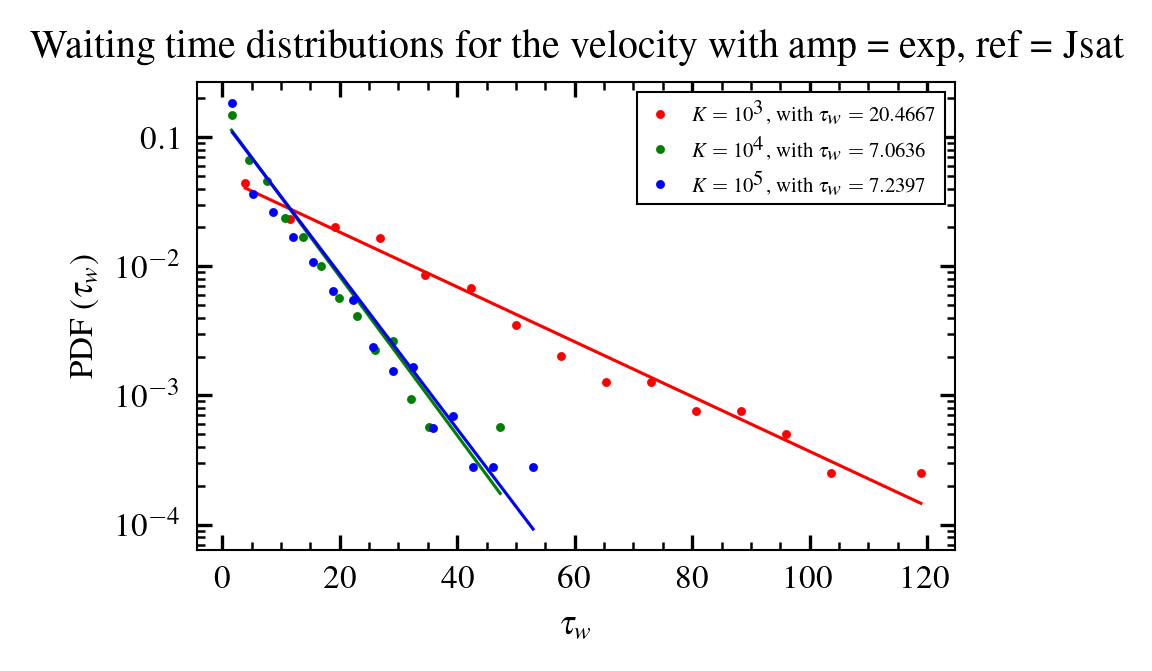

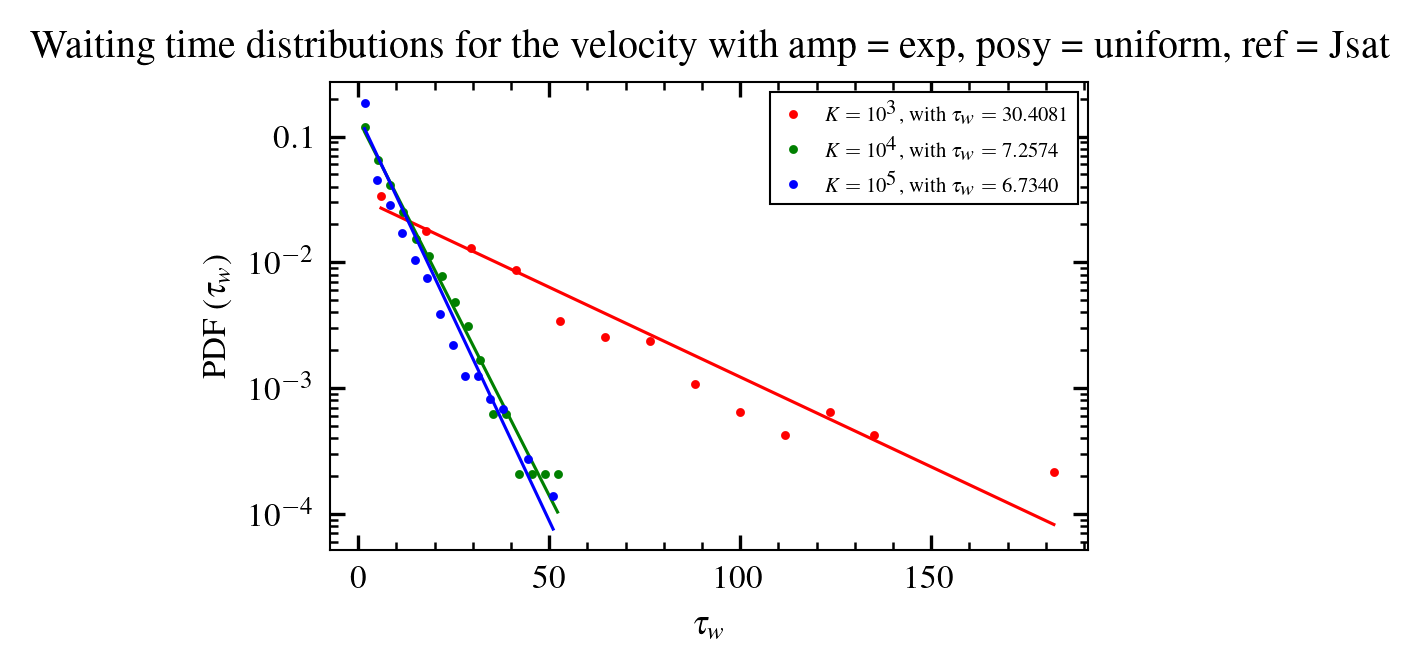

In [379]:
#amp = exp
PDF_WT_01_exp_ref = PDF_WT(cond_events_01_exp_ref, 0, 300)
PDF_WT_1_exp_ref = PDF_WT(cond_events_1_exp_ref, 5, 50)
PDF_WT_10_exp_ref = PDF_WT(cond_events_10_exp_ref, 0, 300)

plt.figure()
plt.semilogy(PDF_WT_01_exp_ref[1], PDF_WT_01_exp_ref[0], '.', label = r'$K = 10^3$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_01_exp_ref[2]), color = 'red')
plt.plot(PDF_WT_01_exp_ref[1], exp_func(PDF_WT_01_exp_ref[1], PDF_WT_01_exp_ref[2]), color = 'red')
plt.semilogy(PDF_WT_1_exp_ref[1], PDF_WT_1_exp_ref[0], '.', label = r'$K = 10^4$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_1_exp_ref[2]), color = 'green')
plt.plot(PDF_WT_1_exp_ref[1], exp_func(PDF_WT_1_exp_ref[1], PDF_WT_1_exp_ref[2]), color = 'green')
plt.semilogy(PDF_WT_10_exp_ref[1], PDF_WT_10_exp_ref[0], '.', label = r'$K = 10^5$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_10_exp_ref[2]), color = 'blue')
plt.plot(PDF_WT_10_exp_ref[1], exp_func(PDF_WT_10_exp_ref[1], PDF_WT_10_exp_ref[2]), color = 'blue')
plt.title('Waiting time distributions for the velocity with amp = exp, ref = Jsat')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlabel(r'$\tau_w$')
plt.ylabel(r'PDF ($\tau_w$)')
plt.show()

#amp = exp, posy
PDF_WT_01_exp_posy_ref = PDF_WT(cond_events_01_exp_posy_ref, 0, 200)
PDF_WT_1_exp_posy_ref = PDF_WT(cond_events_1_exp_posy_ref, 0, 200)
PDF_WT_10_exp_posy_ref = PDF_WT(cond_events_10_exp_posy_ref, 0, 200)

plt.figure()
plt.semilogy(PDF_WT_01_exp_posy_ref[1], PDF_WT_01_exp_posy_ref[0], '.', label = r'$K = 10^3$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_01_exp_posy_ref[2]), color = 'red')
plt.plot(PDF_WT_01_exp_posy_ref[1], exp_func(PDF_WT_01_exp_posy_ref[1], PDF_WT_01_exp_posy_ref[2]), color = 'red')
plt.semilogy(PDF_WT_1_exp_posy_ref[1], PDF_WT_1_exp_posy_ref[0], '.', label = r'$K = 10^4$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_1_exp_posy_ref[2]), color = 'green')
plt.plot(PDF_WT_1_exp_posy_ref[1], exp_func(PDF_WT_1_exp_posy_ref[1], PDF_WT_1_exp_posy_ref[2]), color = 'green')
plt.semilogy(PDF_WT_10_exp_posy_ref[1], PDF_WT_10_exp_posy_ref[0], '.', label = r'$K = 10^5$, with $\tau_w = {:.4f}$'.format(1/PDF_WT_10_exp_posy_ref[2]), color = 'blue')
plt.plot(PDF_WT_10_exp_posy_ref[1], exp_func(PDF_WT_10_exp_posy_ref[1], PDF_WT_10_exp_posy_ref[2]), color = 'blue')
plt.title('Waiting time distributions for the velocity with amp = exp, posy = uniform, ref = Jsat')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlabel(r'$\tau_w$')
plt.ylabel(r'PDF ($\tau_w$)')
plt.show()

## Amplitude

In [380]:
def PDF_exp(x, lamb):
    return lamb*np.exp(-lamb*(x-2.5))

def PDF_A(cond_events, xmin, xmax):
    P_u, bins_u = np.histogram(cond_events.peaks, 8, density=True)
    bin_center_u = (bins_u[1:]+bins_u[:-1])/2
    good = (bin_center_u>=xmin)&(bin_center_u<xmax)&(P_u>0)
    def fit(bin_center_u, A):
        return np.log(PDF_exp(bin_center_u, A))
    A = curve_fit(fit, bin_center_u[good], np.log(P_u[good]), p0 = 1, bounds=(0, np.inf))[0][0]
    return P_u, bin_center_u, A

### No ref

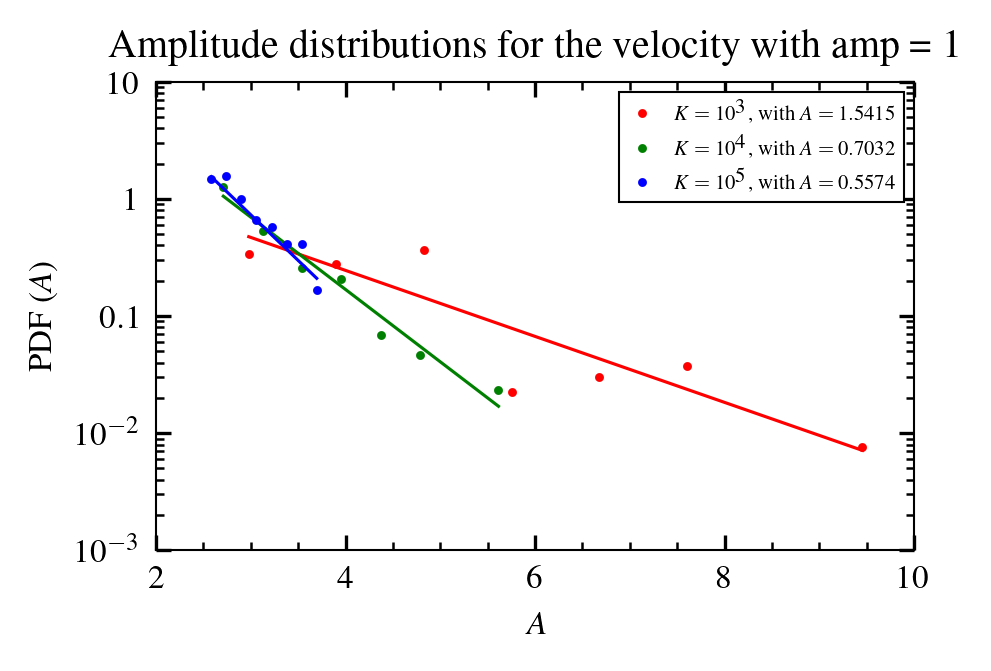

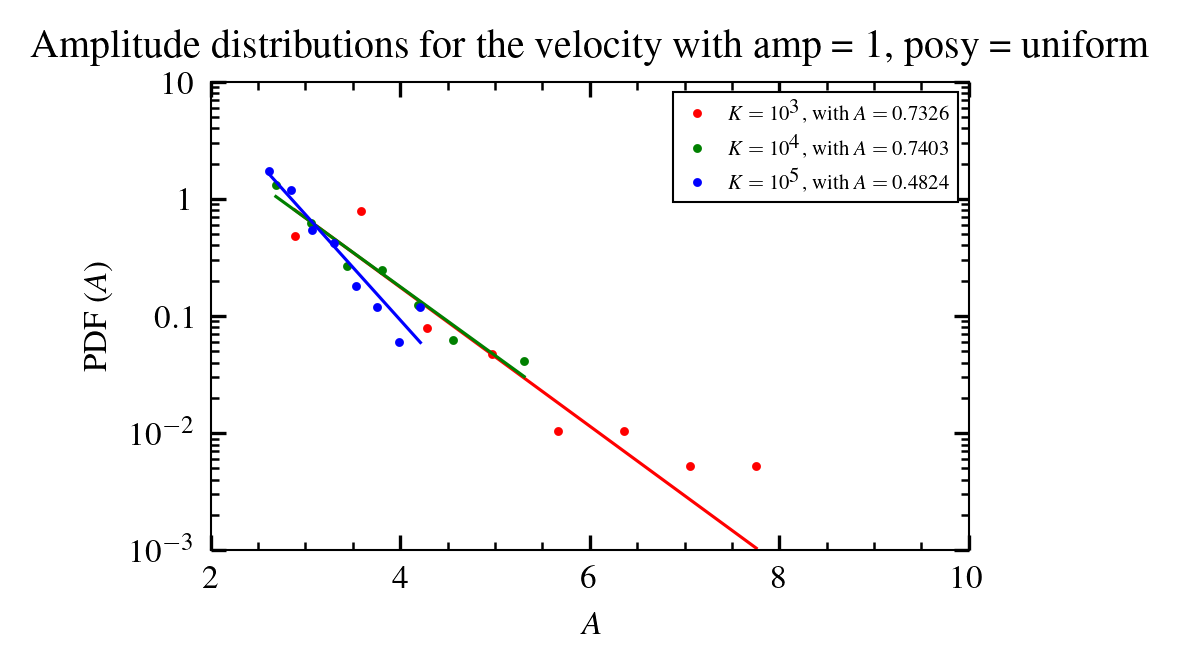

In [446]:
PDF_A_01 = PDF_A(cond_events_01, 2, 10)
PDF_A_1 = PDF_A(cond_events_1, 2, 6)
PDF_A_10 = PDF_A(cond_events_10, 2, 6)

plt.figure()
plt.semilogy(PDF_A_01[1], PDF_A_01[0], '.', label = r'$K = 10^3$, with $A = {:.4f}$'.format(1/PDF_A_01[2]), color = 'red')
plt.plot(PDF_A_01[1], PDF_exp(PDF_A_01[1], PDF_A_01[2]), color = 'red')
plt.semilogy(PDF_A_1[1], PDF_A_1[0], '.', label = r'$K = 10^4$, with $A = {:.4f}$'.format(1/PDF_A_1[2]), color = 'green')
plt.plot(PDF_A_1[1], PDF_exp(PDF_A_1[1], PDF_A_1[2]), color = 'green')
plt.semilogy(PDF_A_10[1], PDF_A_10[0], '.', label = r'$K = 10^5$, with $A = {:.4f}$'.format(1/PDF_A_10[2]), color = 'blue')
plt.plot(PDF_A_10[1], PDF_exp(PDF_A_10[1], PDF_A_10[2]), color = 'blue')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlim(2,10)
plt.ylim(10e-4, 10)
plt.title('Amplitude distributions for the velocity with amp = 1')
plt.xlabel(r'$A$')
plt.ylabel(r'PDF ($A$)')
plt.show()

PDF_A_01_posy = PDF_A(cond_events_01_posy, 2, 7)
PDF_A_1_posy = PDF_A(cond_events_1_posy, 2, 10)
PDF_A_10_posy = PDF_A(cond_events_10_posy, 2, 10)

plt.figure()
plt.semilogy(PDF_A_01_posy[1], PDF_A_01_posy[0], '.', label = r'$K = 10^3$, with $A = {:.4f}$'.format(1/PDF_A_01_posy[2]), color = 'red')
plt.plot(PDF_A_01_posy[1], PDF_exp(PDF_A_01_posy[1], PDF_A_01_posy[2]), color = 'red')
plt.semilogy(PDF_A_1_posy[1], PDF_A_1_posy[0], '.', label = r'$K = 10^4$, with $A = {:.4f}$'.format(1/PDF_A_1_posy[2]), color = 'green')
plt.plot(PDF_A_1_posy[1], PDF_exp(PDF_A_1_posy[1], PDF_A_1_posy[2]), color = 'green')
plt.semilogy(PDF_A_10_posy[1], PDF_A_10_posy[0], '.', label = r'$K = 10^5$, with $A = {:.4f}$'.format(1/PDF_A_10_posy[2]), color = 'blue')
plt.plot(PDF_A_10_posy[1], PDF_exp(PDF_A_10_posy[1], PDF_A_10_posy[2]), color = 'blue')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlim(2,10)
plt.ylim(10e-4, 10)
plt.title('Amplitude distributions for the velocity with amp = 1, posy = uniform')
plt.xlabel(r'$A$')
plt.ylabel(r'PDF ($A$)')
plt.show()

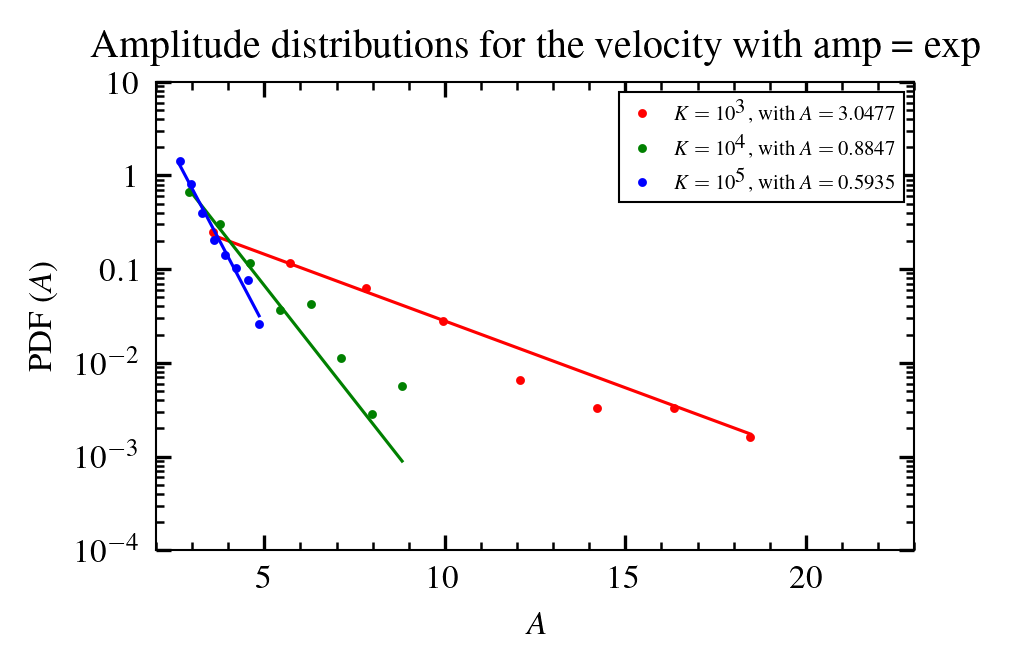

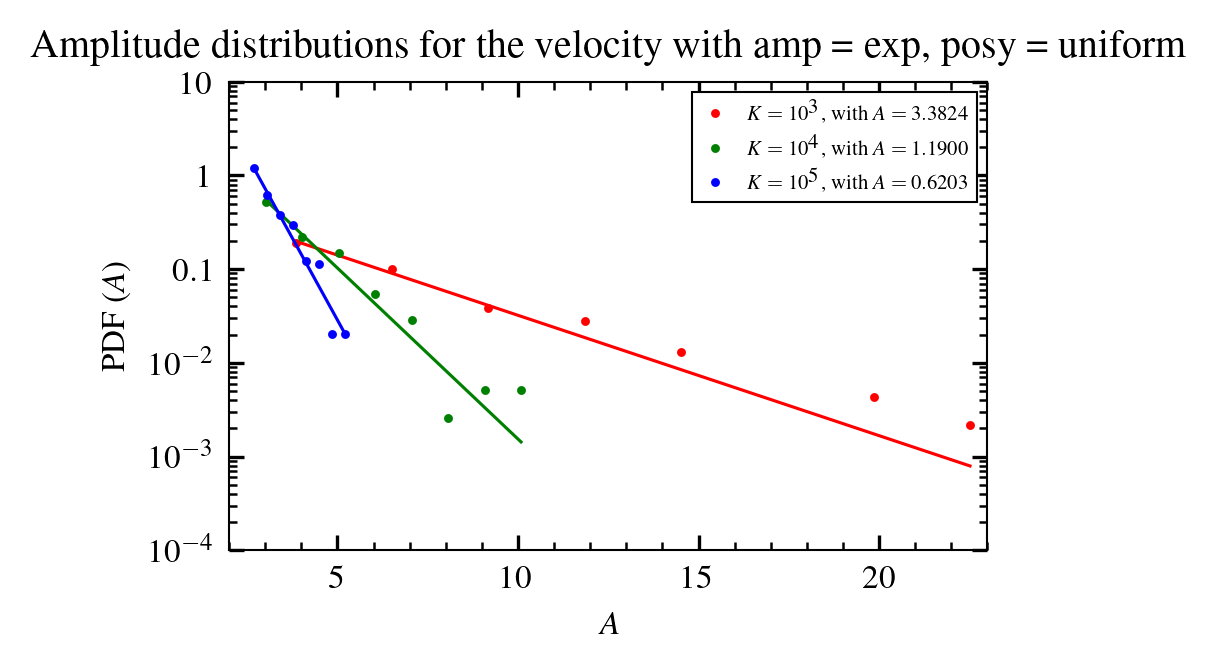

In [386]:
PDF_A_01_exp = PDF_A(cond_events_01_exp, 2, 10)
PDF_A_1_exp = PDF_A(cond_events_1_exp, 2, 6)
PDF_A_10_exp = PDF_A(cond_events_10_exp, 2, 6)

plt.figure()
plt.semilogy(PDF_A_01_exp[1], PDF_A_01_exp[0], '.', label = r'$K = 10^3$, with $A = {:.4f}$'.format(1/PDF_A_01_exp[2]), color = 'red')
plt.plot(PDF_A_01_exp[1], PDF_exp(PDF_A_01_exp[1], PDF_A_01_exp[2]), color = 'red')
plt.semilogy(PDF_A_1_exp[1], PDF_A_1_exp[0], '.', label = r'$K = 10^4$, with $A = {:.4f}$'.format(1/PDF_A_1_exp[2]), color = 'green')
plt.plot(PDF_A_1_exp[1], PDF_exp(PDF_A_1_exp[1], PDF_A_1_exp[2]), color = 'green')
plt.semilogy(PDF_A_10_exp[1], PDF_A_10_exp[0], '.', label = r'$K = 10^5$, with $A = {:.4f}$'.format(1/PDF_A_10_exp[2]), color = 'blue')
plt.plot(PDF_A_10_exp[1], PDF_exp(PDF_A_10_exp[1], PDF_A_10_exp[2]), color = 'blue')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlim(2,23)
plt.ylim(10e-5, 10)
plt.title('Amplitude distributions for the velocity with amp = exp')
plt.xlabel(r'$A$')
plt.ylabel(r'PDF ($A$)')
plt.show()

PDF_A_01_exp_posy = PDF_A(cond_events_01_exp_posy, 0, 10)
PDF_A_1_exp_posy = PDF_A(cond_events_1_exp_posy, 0, 10)
PDF_A_10_exp_posy = PDF_A(cond_events_10_exp_posy, 0, 10)

plt.figure()
plt.semilogy(PDF_A_01_exp_posy[1], PDF_A_01_exp_posy[0], '.', 
             label = r'$K = 10^3$, with $A = {:.4f}$'.format(1/PDF_A_01_exp_posy[2]), color = 'red')
plt.plot(PDF_A_01_exp_posy[1], PDF_exp(PDF_A_01_exp_posy[1], PDF_A_01_exp_posy[2]), color = 'red')
plt.semilogy(PDF_A_1_exp_posy[1], PDF_A_1_exp_posy[0], '.', 
             label = r'$K = 10^4$, with $A = {:.4f}$'.format(1/PDF_A_1_exp_posy[2]), color = 'green')
plt.plot(PDF_A_1_exp_posy[1], PDF_exp(PDF_A_1_exp_posy[1], PDF_A_1_exp_posy[2]), color = 'green')
plt.semilogy(PDF_A_10_exp_posy[1], PDF_A_10_exp_posy[0], '.', 
             label = r'$K = 10^5$, with $A = {:.4f}$'.format(1/PDF_A_10_exp_posy[2]), color = 'blue')
plt.plot(PDF_A_10_exp_posy[1], PDF_exp(PDF_A_10_exp_posy[1], PDF_A_10_exp_posy[2]), color = 'blue')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlim(2,23)
plt.ylim(10e-5, 10)
plt.title('Amplitude distributions for the velocity with amp = exp, posy = uniform')
plt.xlabel(r'$A$')
plt.ylabel(r'PDF ($A$)')
plt.show()

### Ref = Jsat

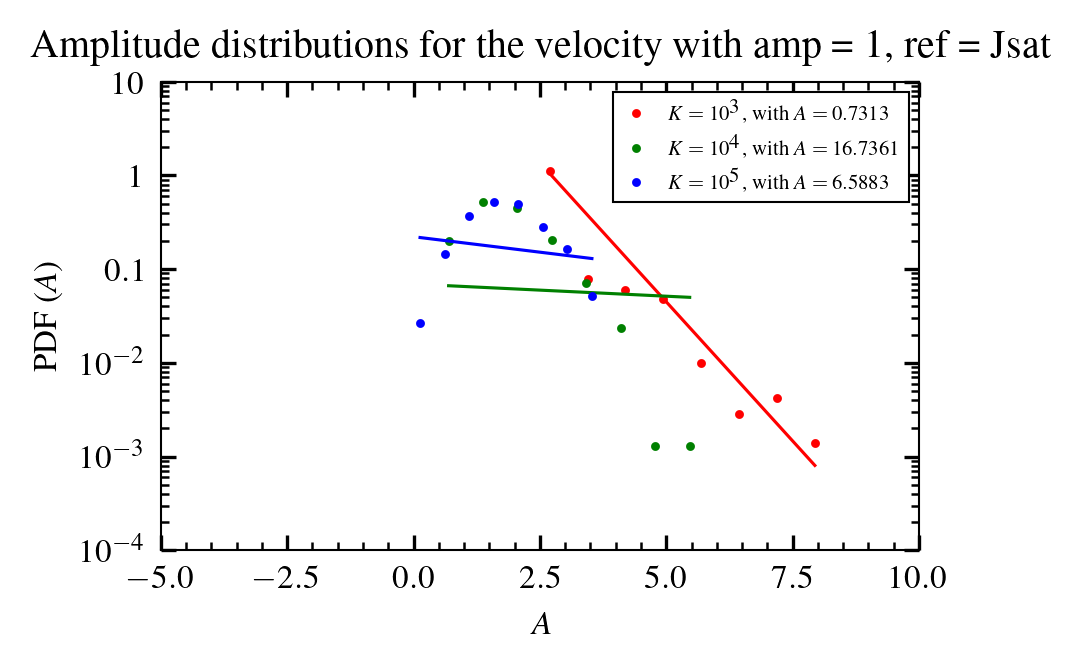

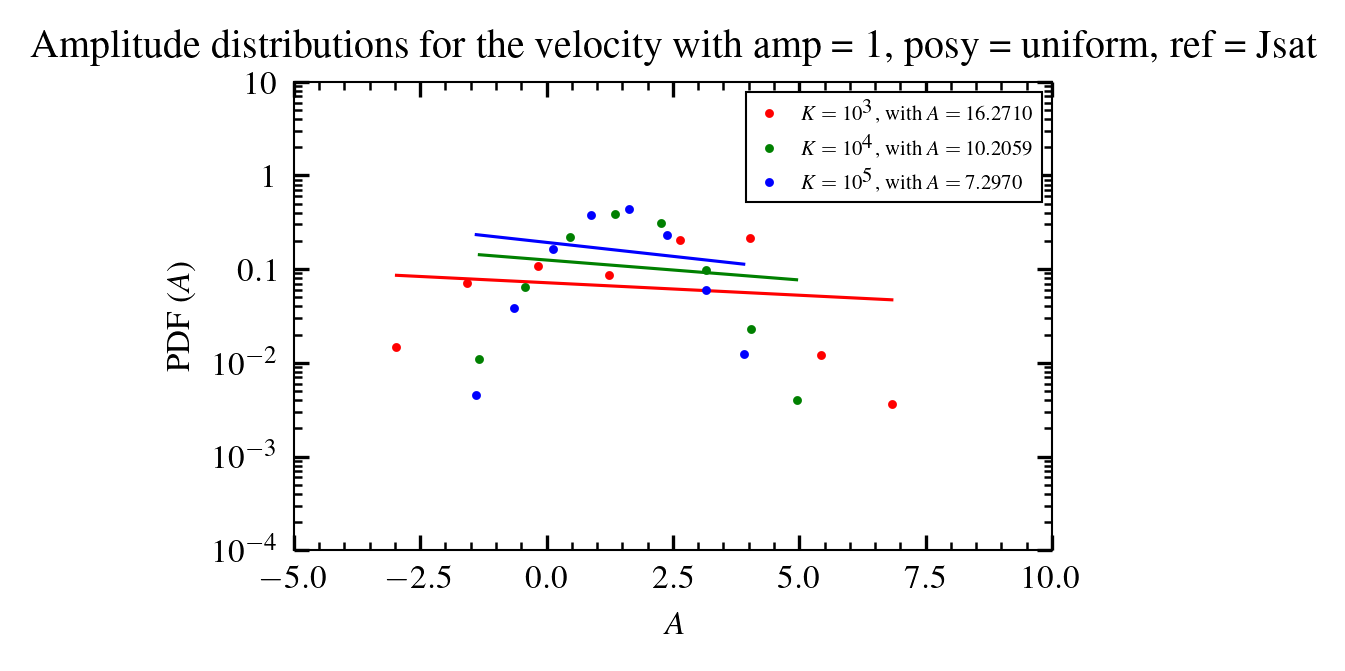

In [439]:
PDF_A_01_ref = PDF_A(cond_events_01_ref, 2, 8)
PDF_A_1_ref = PDF_A(cond_events_1_ref, 0, 6)
PDF_A_10_ref = PDF_A(cond_events_10_ref, 0, 4)

plt.figure()
plt.semilogy(PDF_A_01_ref[1], PDF_A_01_ref[0], '.', label = r'$K = 10^3$, with $A = {:.4f}$'.format(1/PDF_A_01_ref[2]), color = 'red')
plt.plot(PDF_A_01_ref[1], PDF_exp(PDF_A_01_ref[1], PDF_A_01_ref[2]), color = 'red')
plt.semilogy(PDF_A_1_ref[1], PDF_A_1_ref[0], '.', label = r'$K = 10^4$, with $A = {:.4f}$'.format(1/PDF_A_1_ref[2]), color = 'green')
plt.plot(PDF_A_1_ref[1], PDF_exp(PDF_A_1_ref[1], PDF_A_1_ref[2]), color = 'green')
plt.semilogy(PDF_A_10_ref[1], PDF_A_10_ref[0], '.', label = r'$K = 10^5$, with $A = {:.4f}$'.format(1/PDF_A_10_ref[2]), color = 'blue')
plt.plot(PDF_A_10_ref[1], PDF_exp(PDF_A_10_ref[1], PDF_A_10_ref[2]), color = 'blue')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlim(-5,10)
plt.ylim(10e-5, 10)
plt.title('Amplitude distributions for the velocity with amp = 1, ref = Jsat')
plt.xlabel(r'$A$')
plt.ylabel(r'PDF ($A$)')
plt.show()

PDF_A_01_posy_ref = PDF_A(cond_events_01_posy_ref, -2, 10)
PDF_A_1_posy_ref = PDF_A(cond_events_1_posy_ref, 0, 10)
PDF_A_10_posy_ref = PDF_A(cond_events_10_posy_ref, 0, 10)

plt.figure()
plt.semilogy(PDF_A_01_posy_ref[1], PDF_A_01_posy_ref[0], '.', 
             label = r'$K = 10^3$, with $A = {:.4f}$'.format(1/PDF_A_01_posy_ref[2]), color = 'red')
plt.plot(PDF_A_01_posy_ref[1], PDF_exp(PDF_A_01_posy_ref[1], PDF_A_01_posy_ref[2]), color = 'red')
plt.semilogy(PDF_A_1_posy_ref[1], PDF_A_1_posy_ref[0], '.', 
             label = r'$K = 10^4$, with $A = {:.4f}$'.format(1/PDF_A_1_posy_ref[2]), color = 'green')
plt.plot(PDF_A_1_posy_ref[1], PDF_exp(PDF_A_1_posy_ref[1], PDF_A_1_posy_ref[2]), color = 'green')
plt.semilogy(PDF_A_10_posy_ref[1], PDF_A_10_posy_ref[0], '.', 
             label = r'$K = 10^5$, with $A = {:.4f}$'.format(1/PDF_A_10_posy_ref[2]), color = 'blue')
plt.plot(PDF_A_10_posy_ref[1], PDF_exp(PDF_A_10_posy_ref[1], PDF_A_10_posy_ref[2]), color = 'blue')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlim(-5,10)
plt.ylim(10e-5, 10)
plt.title('Amplitude distributions for the velocity with amp = 1, posy = uniform, ref = Jsat')
plt.xlabel(r'$A$')
plt.ylabel(r'PDF ($A$)')
plt.show()

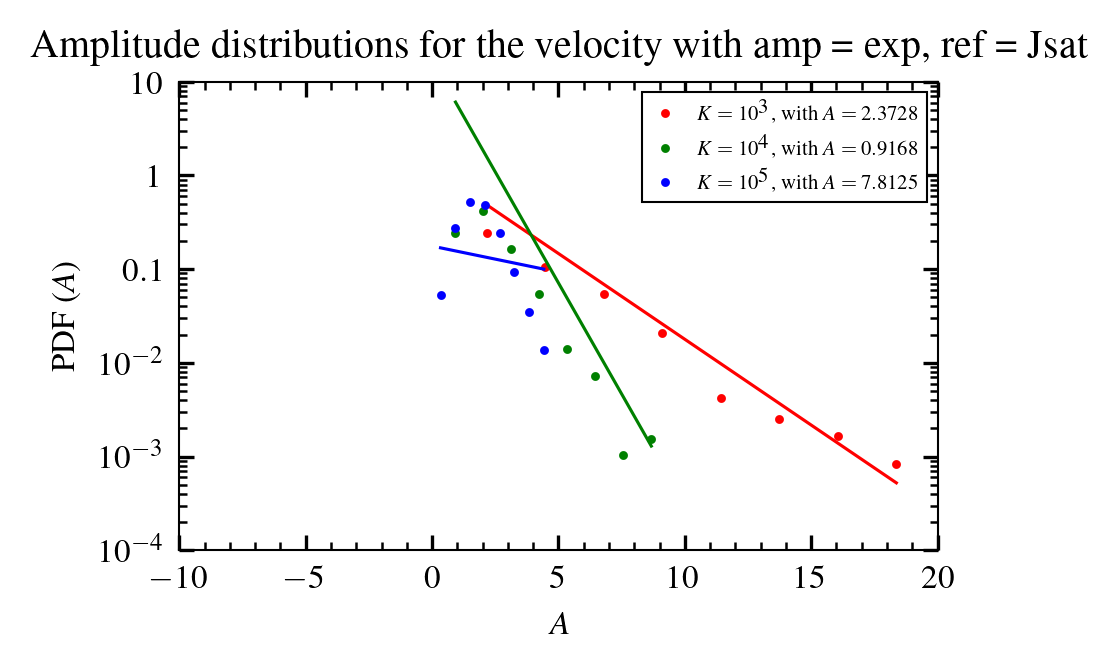

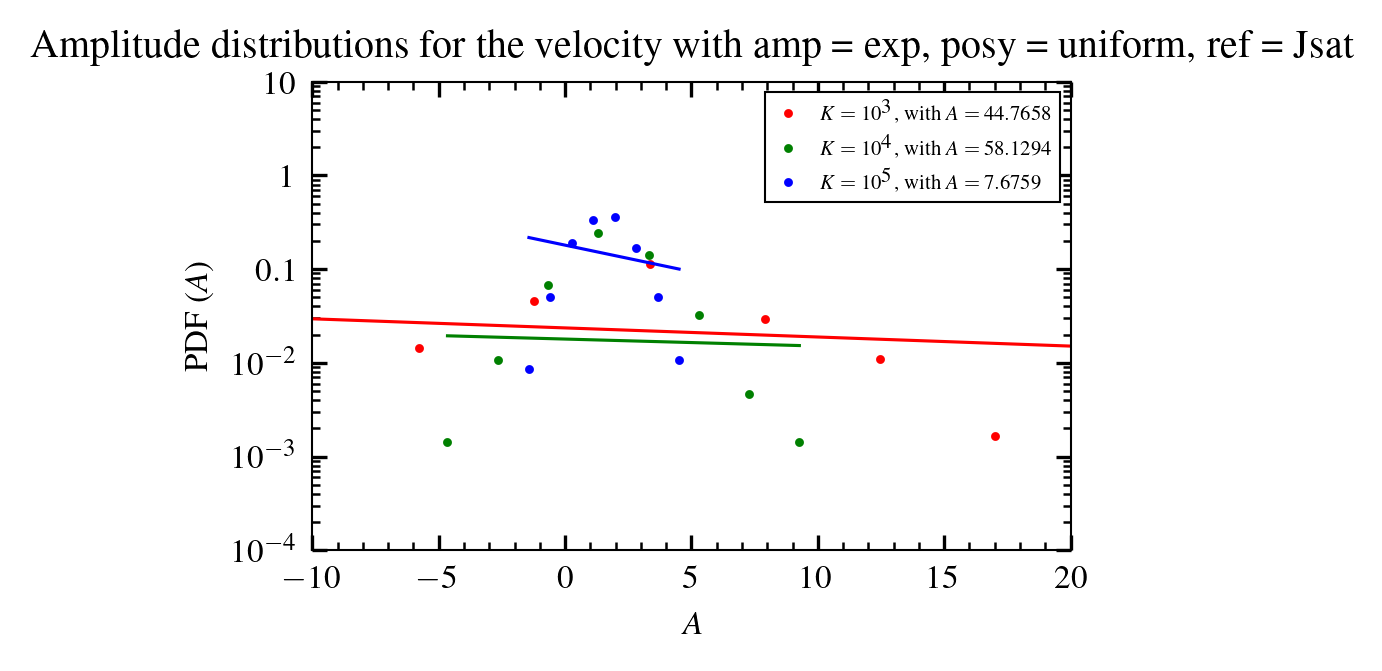

In [393]:
PDF_A_01_exp_ref = PDF_A(cond_events_01_exp_ref, 0, 20)
PDF_A_1_exp_ref = PDF_A(cond_events_1_exp_ref, 0, 10)
PDF_A_10_exp_ref = PDF_A(cond_events_10_exp_ref, 0, 5)

plt.figure()
plt.semilogy(PDF_A_01_exp_ref[1], PDF_A_01_exp_ref[0], '.', 
             label = r'$K = 10^3$, with $A = {:.4f}$'.format(1/PDF_A_01_exp_ref[2]), color = 'red')
plt.plot(PDF_A_01_exp_ref[1], PDF_exp(PDF_A_01_exp_ref[1], PDF_A_01_exp_ref[2]), color = 'red')
plt.semilogy(PDF_A_1_exp_ref[1], PDF_A_1_exp_ref[0], '.', 
             label = r'$K = 10^4$, with $A = {:.4f}$'.format(1/PDF_A_1_exp_ref[2]), color = 'green')
plt.plot(PDF_A_1_exp_ref[1], PDF_exp(PDF_A_1_exp_ref[1], PDF_A_1_exp_ref[2]), color = 'green')
plt.semilogy(PDF_A_10_exp_ref[1], PDF_A_10_exp_ref[0], '.', 
             label = r'$K = 10^5$, with $A = {:.4f}$'.format(1/PDF_A_10_exp_ref[2]), color = 'blue')
plt.plot(PDF_A_10_exp_ref[1], PDF_exp(PDF_A_10_exp_ref[1], PDF_A_10_exp_ref[2]), color = 'blue')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlim(-10, 20)
plt.ylim(10e-5, 10)
plt.title('Amplitude distributions for the velocity with amp = exp, ref = Jsat')
plt.xlabel(r'$A$')
plt.ylabel(r'PDF ($A$)')
plt.show()

PDF_A_01_exp_posy_ref = PDF_A(cond_events_01_exp_posy_ref, -10, 20)
PDF_A_1_exp_posy_ref = PDF_A(cond_events_1_exp_posy_ref, -10, 10)
PDF_A_10_exp_posy_ref = PDF_A(cond_events_10_exp_posy_ref, 0, 5)

plt.figure()
plt.semilogy(PDF_A_01_exp_posy_ref[1], PDF_A_01_exp_posy_ref[0], '.', 
             label = r'$K = 10^3$, with $A = {:.4f}$'.format(1/PDF_A_01_exp_posy_ref[2]), color = 'red')
plt.plot(PDF_A_01_exp_posy_ref[1], PDF_exp(PDF_A_01_exp_posy_ref[1], PDF_A_01_exp_posy_ref[2]), color = 'red')
plt.semilogy(PDF_A_1_exp_posy_ref[1], PDF_A_1_exp_posy_ref[0], '.', 
             label = r'$K = 10^4$, with $A = {:.4f}$'.format(1/PDF_A_1_exp_posy_ref[2]), color = 'green')
plt.plot(PDF_A_1_exp_posy_ref[1], PDF_exp(PDF_A_1_exp_posy_ref[1], PDF_A_1_exp_posy_ref[2]), color = 'green')
plt.semilogy(PDF_A_10_exp_posy_ref[1], PDF_A_10_exp_posy_ref[0], '.', 
             label = r'$K = 10^5$, with $A = {:.4f}$'.format(1/PDF_A_10_exp_posy_ref[2]), color = 'blue')
plt.plot(PDF_A_10_exp_posy_ref[1], PDF_exp(PDF_A_10_exp_posy_ref[1], PDF_A_10_exp_posy_ref[2]), color = 'blue')
plt.legend(fontsize = '5', loc = 'upper right')
plt.xlim(-10, 20)
plt.ylim(10e-5, 10)
plt.title('Amplitude distributions for the velocity with amp = exp, posy = uniform, ref = Jsat')
plt.xlabel(r'$A$')
plt.ylabel(r'PDF ($A$)')
plt.show()